In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_parquet('train.parquet')

In [3]:
data['page'].unique()

array(['NextSong', 'Downgrade', 'Help', 'Home', 'Thumbs Up', 'Add Friend',
       'Thumbs Down', 'Add to Playlist', 'Logout', 'About', 'Settings',
       'Save Settings', 'Cancel', 'Cancellation Confirmation',
       'Submit Downgrade', 'Roll Advert', 'Upgrade', 'Error',
       'Submit Upgrade'], dtype=object)

In [4]:
data.head()

,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
0,200,M,Shlok,paid,Johnson,1749042,1538352001000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",278,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,524.32934,Ich mache einen Spiegel - Dream Part 4,Popol Vuh,2018-10-01 00:00:01,2018-08-08 13:22:21
992,200,M,Shlok,paid,Johnson,1749042,1538352525000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",279,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,178.02404,Monster (Album Version),Skillet,2018-10-01 00:08:45,2018-08-08 13:22:21
1360,200,M,Shlok,paid,Johnson,1749042,1538352703000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",280,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,232.61995,Seven Nation Army,The White Stripes,2018-10-01 00:11:43,2018-08-08 13:22:21
1825,200,M,Shlok,paid,Johnson,1749042,1538352935000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",281,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,265.50812,Under The Bridge (Album Version),Red Hot Chili Peppers,2018-10-01 00:15:35,2018-08-08 13:22:21
2366,200,M,Shlok,paid,Johnson,1749042,1538353200000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",282,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,471.69261,Circlesong 6,Bobby McFerrin,2018-10-01 00:20:00,2018-08-08 13:22:21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17499636 entries, 0 to 25661583
Data columns (total 19 columns):
 #   Column         Dtype         
---  ------         -----         
 0   status         int64         
 1   gender         object        
 2   firstName      object        
 3   level          object        
 4   lastName       object        
 5   userId         object        
 6   ts             int64         
 7   auth           object        
 8   page           object        
 9   sessionId      int64         
 10  location       object        
 11  itemInSession  int64         
 12  userAgent      object        
 13  method         object        
 14  length         float64       
 15  song           object        
 16  artist         object        
 17  time           datetime64[us]
 18  registration   datetime64[us]
dtypes: datetime64[us](2), float64(1), int64(4), object(12)
memory usage: 2.6+ GB


In [32]:
df_train = pd.read_parquet('train.parquet')
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
print(f"Nombre total d'utilisateurs uniques : {df_train['userId'].nunique()}")
print(f"Nombre de churners : {len(churn_users)}")
print(f"Pourcentage de churn : {len(churn_users) / df_train['userId'].nunique() * 100:.2f}%")
print("\nTypes d'actions possibles (Pages) :")
print(df_train['page'].unique())

Nombre total d'utilisateurs uniques : 19140
Nombre de churners : 4271
Pourcentage de churn : 22.31%

Types d'actions possibles (Pages) :
['NextSong' 'Downgrade' 'Help' 'Home' 'Thumbs Up' 'Add Friend'
 'Thumbs Down' 'Add to Playlist' 'Logout' 'About' 'Settings'
 'Save Settings' 'Cancel' 'Cancellation Confirmation' 'Submit Downgrade'
 'Roll Advert' 'Upgrade' 'Error' 'Submit Upgrade']


In [43]:
user_features = pd.crosstab(df_train['userId'], df_train['page'])
user_features.columns.name = None
user_features.reset_index(inplace=True)
print("Dimensions du nouveau tableau :", user_features.shape)
user_features.head()

Dimensions du nouveau tableau : (19140, 20)


,userId,About,Add Friend,Add to Playlist,Cancel,Cancellation Confirmation,Downgrade,Error,Help,Home,Logout,NextSong,Roll Advert,Save Settings,Settings,Submit Downgrade,Submit Upgrade,Thumbs Down,Thumbs Up,Upgrade
0,1000025,1,30,53,1,1,18,1,8,77,26,1662,7,3,8,0,1,13,94,1
1,1000035,2,23,27,0,0,7,1,5,54,19,1266,6,1,7,0,1,15,117,5
2,1000083,0,6,8,1,1,2,0,2,21,14,501,8,0,5,0,1,2,21,3
3,1000103,0,0,1,0,0,1,0,0,6,2,57,3,0,0,0,1,1,2,1
4,1000164,2,17,24,0,0,10,1,4,40,11,847,20,1,5,0,1,6,38,1


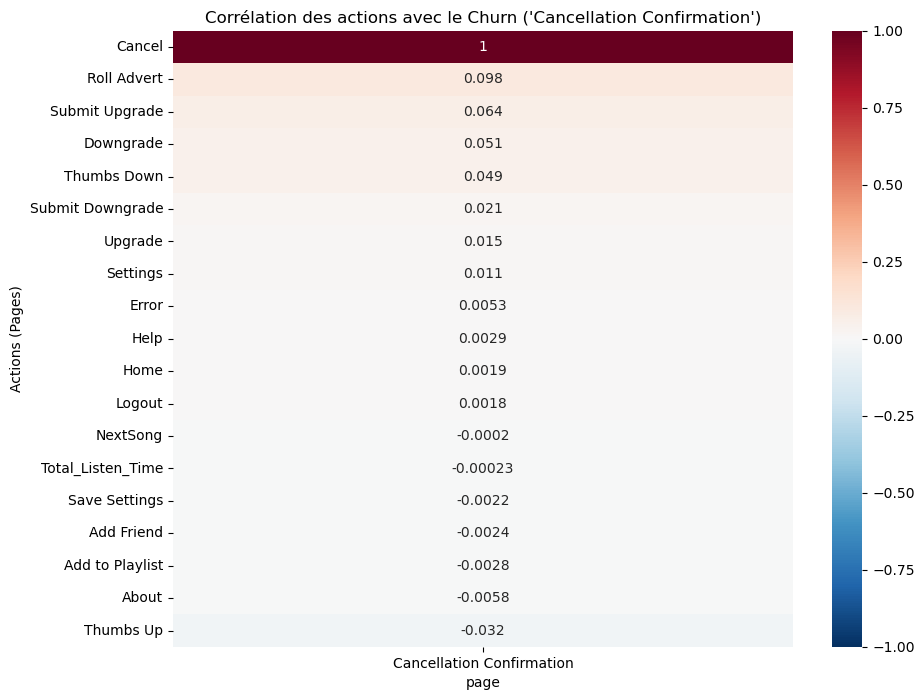

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_data = pd.crosstab(df_train['userId'], df_train['page'])
total_listen_time = df_train.groupby('userId')['length'].sum()
corr_data['Total_Listen_Time'] = total_listen_time
corr_matrix = corr_data.corr()
churn_correlation = corr_matrix[['Cancellation Confirmation']].sort_values(by='Cancellation Confirmation', ascending=False)
churn_correlation = churn_correlation.drop('Cancellation Confirmation')
plt.figure(figsize=(10, 8))
sns.heatmap(churn_correlation, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title("Corrélation des actions avec le Churn ('Cancellation Confirmation')")
plt.ylabel('Actions (Pages)')
plt.show()

In [35]:
user_features['target'] = user_features['userId'].isin(churn_users).astype(int)
cols_to_drop = ['Cancellation Confirmation', 'Cancel']
cols_to_drop = [c for c in cols_to_drop if c in user_features.columns]
user_features = user_features.drop(columns=cols_to_drop)
print("Distribution de la target :")
print(user_features['target'].value_counts())
print("\nColonnes restantes (vérifie que 'Cancel' a disparu) :")
print(user_features.columns.tolist())

Distribution de la target :
target
0    14869
1     4271
Name: count, dtype: int64

Colonnes restantes (vérifie que 'Cancel' a disparu) :
['userId', 'About', 'Add Friend', 'Add to Playlist', 'Downgrade', 'Error', 'Help', 'Home', 'Logout', 'NextSong', 'Roll Advert', 'Save Settings', 'Settings', 'Submit Downgrade', 'Submit Upgrade', 'Thumbs Down', 'Thumbs Up', 'Upgrade', 'target']


In [36]:
user_meta = df_train.sort_values('ts').groupby('userId')[['level', 'gender']].last()

# 2. On transforme le texte en chiffres (Encodage)
# Les modèles adorent les 0 et les 1, mais détestent le texte "paid" ou "M"
user_meta['is_paid'] = (user_meta['level'] == 'paid').astype(int) # 1 si payant, 0 si gratuit
user_meta['is_male'] = (user_meta['gender'] == 'M').astype(int)   # 1 si Homme, 0 si Femme

# 3. On colle ces nouvelles infos dans notre tableau principal 'user_features'
user_features = user_features.merge(user_meta[['is_paid', 'is_male']], on='userId', how='left')

# Vérification : Tu devrais voir tes colonnes d'actions + is_paid + is_male + target
print("Nouvelles colonnes ajoutées :")
print(user_features[['userId', 'is_paid', 'is_male', 'target']].head())

Nouvelles colonnes ajoutées :
    userId  is_paid  is_male  target
0  1000025        1        1       1
1  1000035        1        0       0
2  1000083        1        1       1
3  1000103        1        0       0
4  1000164        1        0       0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# 1. Préparation des variables (X) et de la cible (y)
# On enlève 'userId' (c'est juste un ID) et 'target' (c'est la réponse) de X
X = user_features.drop(columns=['userId', 'target'])
y = user_features['target']

# 2. Séparation : 80% pour apprendre (Train), 20% pour vérifier (Validation)
# random_state=42 permet d'avoir toujours le même découpage si on relance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraînement du modèle
print("Entraînement du modèle en cours...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Prédiction sur les 20% cachés
y_pred = model.predict(X_val)

# 5. Résultats
score = balanced_accuracy_score(y_val, y_pred)
print(f"--- RÉSULTATS ---")
print(f"Balanced Accuracy Score : {score:.4f}")
print("\nRapport détaillé :")
print(classification_report(y_val, y_pred))

Entraînement du modèle en cours...
--- RÉSULTATS ---
Balanced Accuracy Score : 0.5603

Rapport détaillé :
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2978
           1       0.62      0.15      0.24       850

    accuracy                           0.79      3828
   macro avg       0.71      0.56      0.56      3828
weighted avg       0.76      0.79      0.74      3828



In [11]:
# 1. Chargement du Test
df_test = pd.read_parquet('test.parquet')

# 2. Création des mêmes features que pour le train
test_features = pd.crosstab(df_test['userId'], df_test['page'])
test_features.columns.name = None
test_features = test_features.reset_index()

# 3. Ajout des métadonnées (Gender, Paid)
test_meta = df_test.sort_values('ts').groupby('userId')[['level', 'gender']].last()
test_meta['is_paid'] = (test_meta['level'] == 'paid').astype(int)
test_meta['is_male'] = (test_meta['gender'] == 'M').astype(int)

test_features = test_features.merge(test_meta[['is_paid', 'is_male']], on='userId', how='left')

# 4. ALIGNEMENT DES COLONNES (Étape CRUCIALE)
# Le modèle attend EXACTEMENT les mêmes colonnes, dans le même ordre que X_train
# Si le test a des colonnes en plus (ex: une page jamais visitée dans le train), on les vire.
# S'il en manque, on les ajoute avec des 0.

# Récupérer les colonnes utilisées par le modèle (tout sauf userId et target)
model_cols = X.columns.tolist()

# On s'assure que test_features a toutes les colonnes nécessaires
for col in model_cols:
    if col not in test_features.columns:
        test_features[col] = 0 # On remplit avec 0 si la colonne manque

# On ne garde que les colonnes utiles et dans le bon ordre
X_test = test_features[model_cols]

# 5. Prédiction
# On prédit 0 ou 1 (Target)
predictions = model.predict(X_test)

# 6. Création du fichier de soumission
submission = pd.DataFrame({
    'id': test_features['userId'], # Attention, Kaggle appelle ça 'id' dans l'exemple
    'target': predictions
})

# Vérification du format
print(submission.head())

# Sauvegarde en CSV (sans l'index pandas 0,1,2...)
submission.to_csv('submission_v1.csv', index=False)
print("Fichier 'submission_v1.csv' créé avec succès !")

        id  target
0  1000655       0
1  1000963       0
2  1001129       0
3  1001963       0
4  1002283       0
Fichier 'submission_v1.csv' créé avec succès !


In [12]:
submission

,id,target
0,1000655,0
1,1000963,0
2,1001129,0
3,1001963,0
4,1002283,0
...,...,...
2899,1999455,0
2900,1999691,0
2901,1999720,0
2902,1999908,0


In [13]:
# --- VERSION CORRIGÉE ET SÉCURISÉE ---

# 1. On s'assure de repartir du df_train propre et on convertit en dates
df_train['date_time'] = pd.to_datetime(df_train['ts'], unit='ms')
df_train['registration_date'] = pd.to_datetime(df_train['registration'], unit='ms')

# 2. Calcul des stats par session (Moyenne d'actions)
session_stats = df_train.groupby(['userId', 'sessionId'])['itemInSession'].max().reset_index()
avg_actions = session_stats.groupby('userId')['itemInSession'].mean().rename('avg_actions_per_session')

# 3. Calcul des variables temporelles (En utilisant les colonnes DATES créées au point 1)
# On récupère la date min/max et la date d'inscription
user_times = df_train.groupby('userId').agg({
    'date_time': ['min', 'max'],
    'registration_date': 'min'
})

# On renomme les colonnes proprement pour éviter les confusions
user_times.columns = ['first_action', 'last_action', 'reg_date']

# 4. Calcul des durées (La partie qui plantait)
# Pandas calcule la différence (Timedelta), et on extrait le nombre de jours (.dt.days)

# Lifetime : Dernière action - Date d'inscription
user_times['lifetime_days'] = (user_times['last_action'] - user_times['reg_date']).dt.days

# Silence : Date max du dataset - Dernière action de l'user
max_date_dataset = df_train['date_time'].max()
user_times['days_since_last_action'] = (max_date_dataset - user_times['last_action']).dt.days

# 5. On rassemble tout dans user_features
# IMPORTANT : On recrée user_features de base pour éviter les doublons si tu as déjà lancé le code avant
user_features = pd.crosstab(df_train['userId'], df_train['page'])
user_features.columns.name = None
user_features = user_features.reset_index()

# On remet la target et on nettoie (comme à l'étape 3)
user_features['target'] = user_features['userId'].isin(churn_users).astype(int)
cols_to_drop = [c for c in ['Cancellation Confirmation', 'Cancel'] if c in user_features.columns]
user_features = user_features.drop(columns=cols_to_drop)

# On rajoute les infos de profil (Gender/Paid)
user_meta = df_train.sort_values('ts').groupby('userId')[['level', 'gender']].last()
user_features['is_paid'] = (user_meta['level'] == 'paid').astype(int).values
user_features['is_male'] = (user_meta['gender'] == 'M').astype(int).values

# ENFIN, on fusionne nos nouvelles variables temporelles
user_features = user_features.merge(avg_actions, on='userId', how='left')
user_features = user_features.merge(user_times[['lifetime_days', 'days_since_last_action']], on='userId', how='left')

# Vérification finale
print("Tout est bon ! Voici les nouvelles colonnes :")
print(user_features[['userId', 'lifetime_days', 'days_since_last_action']].head())

Tout est bon ! Voici les nouvelles colonnes :
    userId  lifetime_days  days_since_last_action
0  1000025            100                      32
1  1000035             63                       4
2  1000083             34                      38
3  1000103             47                      11
4  1000164             99                       0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# 1. Préparation X et y
# On enlève les identifiants et la réponse
X = user_features.drop(columns=['userId', 'target'])
y = user_features['target']

# 2. Remplacer les valeurs vides (NaN) par 0 au cas où le calcul a généré des trous
X = X.fillna(0)

# 3. Séparation (80% Train / 20% Val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Score
y_pred = model.predict(X_val)
score = balanced_accuracy_score(y_val, y_pred)

print(f"--- RÉSULTATS V2 ---")
print(f"Ancien score environ : 0.56")
print(f"NOUVEAU Balanced Accuracy Score : {score:.4f}")

--- RÉSULTATS V2 ---
Ancien score environ : 0.56
NOUVEAU Balanced Accuracy Score : 0.8493


In [15]:
# --- PRÉPARATION DU FICHIER TEST ET SOUMISSION ---

print("Chargement et transformation du Test Set...")
df_test = pd.read_parquet('test.parquet')

# 1. Base : Compter les actions (Crosstab)
test_features = pd.crosstab(df_test['userId'], df_test['page'])
test_features.columns.name = None
test_features = test_features.reset_index()

# 2. Ajout Gender / Paid
test_meta = df_test.sort_values('ts').groupby('userId')[['level', 'gender']].last()
test_features['is_paid'] = (test_meta['level'] == 'paid').astype(int).values
test_features['is_male'] = (test_meta['gender'] == 'M').astype(int).values

# 3. --- CALCUL DES VARIABLES TEMPORELLES POUR LE TEST ---
# Conversion dates
df_test['date_time'] = pd.to_datetime(df_test['ts'], unit='ms')
df_test['registration_date'] = pd.to_datetime(df_test['registration'], unit='ms')

# Moyenne actions par session
session_stats_test = df_test.groupby(['userId', 'sessionId'])['itemInSession'].max().reset_index()
avg_actions_test = session_stats_test.groupby('userId')['itemInSession'].mean().rename('avg_actions_per_session')

# Min/Max dates
user_times_test = df_test.groupby('userId').agg({
    'date_time': ['min', 'max'],
    'registration_date': 'min'
})
user_times_test.columns = ['first_action', 'last_action', 'reg_date']

# Calcul des durées (Lifetime et Silence)
user_times_test['lifetime_days'] = (user_times_test['last_action'] - user_times_test['reg_date']).dt.days
max_date_test = df_test['date_time'].max() # La date de fin du fichier test
user_times_test['days_since_last_action'] = (max_date_test - user_times_test['last_action']).dt.days

# Fusionner tout ça dans test_features
test_features = test_features.merge(avg_actions_test, on='userId', how='left')
test_features = test_features.merge(user_times_test[['lifetime_days', 'days_since_last_action']], on='userId', how='left')

# 4. ALIGNEMENT DES COLONNES (Indispensable)
model_cols = X_train.columns.tolist() # Les colonnes exactes apprises par le modèle

for col in model_cols:
    if col not in test_features.columns:
        test_features[col] = 0 # On comble les manques

X_test = test_features[model_cols] # On garde le bon ordre
X_test = X_test.fillna(0) # Sécurité finale

# 5. Prédiction et Export
predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

submission.to_csv('submission_v2_features.csv', index=False)
print("Fichier 'submission_v2_features.csv' prêt ! À toi de jouer sur Kaggle.")

Chargement et transformation du Test Set...
Fichier 'submission_v2_features.csv' prêt ! À toi de jouer sur Kaggle.


In [16]:
# --- VERSION 3 : CORRECTION DU PIÈGE TEMPOREL & MODÈLE AGRESSIF ---

# 1. On nettoie les features (On vire la variable temporelle biaisée)
# On garde l'ancienneté (lifetime) mais on enlève le "silence" qui trompe le modèle
features_to_drop = ['days_since_last_action', 'userId', 'target']

# Si la colonne existe, on l'enlève de la liste des features
clean_features = [c for c in user_features.columns if c not in features_to_drop]

X = user_features[clean_features]
y = user_features['target']
X = X.fillna(0)

# 2. Split Train/Val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. NOUVEAU MODÈLE PLUS AGRESSIF
# class_weight='balanced' : C'est la clé ! Ça dit au modèle :
# "Si tu rates un Churner, c'est beaucoup plus grave que de rater un non-churner"
print("Entraînement du modèle V3 (Mode Agressif)...")
model = RandomForestClassifier(
    n_estimators=200,          # Plus d'arbres
    max_depth=10,              # On limite la profondeur pour éviter d'apprendre par coeur
    class_weight='balanced',   # INDISPENSABLE pour décoller de 0.5
    random_state=42
)
model.fit(X_train, y_train)

# 4. Vérification du score local
y_pred = model.predict(X_val)
score = balanced_accuracy_score(y_val, y_pred)
print(f"--- RÉSULTATS V3 ---")
print(f"Balanced Accuracy Score : {score:.4f}")
print(classification_report(y_val, y_pred))

# --- GÉNÉRATION DU FICHIER DE SOUMISSION DIRECTEMENT ---

# Préparation du test avec les mêmes colonnes EXACTES
X_test_final = test_features[clean_features].fillna(0)

# Prédiction
predictions = model.predict(X_test_final)

# Fichier CSV
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

submission.to_csv('submission_v3_balanced.csv', index=False)
print("\nFichier 'submission_v3_balanced.csv' généré.")

Entraînement du modèle V3 (Mode Agressif)...
--- RÉSULTATS V3 ---
Balanced Accuracy Score : 0.6990
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2978
           1       0.60      0.49      0.54       850

    accuracy                           0.81      3828
   macro avg       0.73      0.70      0.71      3828
weighted avg       0.80      0.81      0.81      3828


Fichier 'submission_v3_balanced.csv' généré.


In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier

# --- ÉTAPE 1 : CRÉATION DE RATIOS INTELLIGENTS ---

# On reprend notre tableau de base (comptage des actions)
# Assure-toi que 'user_features' contient bien les colonnes 'Thumbs Down', 'Error', etc.
# Si besoin, relance le crosstab du début.

# Calcul du nombre total d'actions par utilisateur
user_features['total_actions'] = user_features.drop(columns=['userId', 'target', 'is_paid', 'is_male'], errors='ignore').sum(axis=1)

# On évite la division par zéro
user_features['total_actions'] = user_features['total_actions'].replace(0, 1)

# Création des Ratios (La qualité de l'expérience)
user_features['thumbs_down_rate'] = user_features['Thumbs Down'] / user_features['total_actions']
user_features['error_rate'] = user_features['Error'] / user_features['total_actions']
user_features['advert_rate'] = user_features['Roll Advert'] / user_features['total_actions']
user_features['social_rate'] = user_features['Add Friend'] / user_features['total_actions']

# On nettoie les infinis s'il y en a
user_features = user_features.fillna(0)

# --- ÉTAPE 2 : PRÉPARATION ET ENTRAÎNEMENT (BOOSTING) ---

# Sélection des colonnes (On garde les actions brutes + les ratios + le profil)
X = user_features.drop(columns=['userId', 'target', 'total_actions']) 
y = user_features['target']

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# NOUVEAU MODÈLE : HistGradientBoosting
# Il gère mieux les déséquilibres et les relations complexes que le Random Forest
print("Entraînement du modèle Boosting...")
model_boost = HistGradientBoostingClassifier(
    learning_rate=0.05, 
    max_iter=200, 
    max_depth=10,
    class_weight='balanced', # Toujours très important !
    random_state=42
)
model_boost.fit(X_train, y_train)

# --- ÉTAPE 3 : RÉSULTATS ---
y_pred = model_boost.predict(X_val)
score = balanced_accuracy_score(y_val, y_pred)

print(f"--- RÉSULTATS BOOSTING ---")
print(f"Balanced Accuracy Score : {score:.4f}")
print(classification_report(y_val, y_pred))

Entraînement du modèle Boosting...
--- RÉSULTATS BOOSTING ---
Balanced Accuracy Score : 0.8753
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2978
           1       0.74      0.83      0.78       850

    accuracy                           0.90      3828
   macro avg       0.85      0.88      0.86      3828
weighted avg       0.90      0.90      0.90      3828



In [18]:
# --- GÉNÉRATION DE LA SOUMISSION (AVEC RATIOS & BOOSTING) ---

print("Préparation du fichier Test...")

# 1. On s'assure d'avoir les données de base du test
# (On reprend test_features qu'on a créé avant avec les counts)
# Si tu as un doute, on le recrée vite fait :
df_test = pd.read_parquet('test.parquet')
test_features = pd.crosstab(df_test['userId'], df_test['page'])
test_features.columns.name = None
test_features = test_features.reset_index()

# Ajout des infos de profil (Gender/Paid)
test_meta = df_test.sort_values('ts').groupby('userId')[['level', 'gender']].last()
test_features['is_paid'] = (test_meta['level'] == 'paid').astype(int).values
test_features['is_male'] = (test_meta['gender'] == 'M').astype(int).values

# 2. CRÉATION DES RATIOS POUR LE TEST (Même logique que le train)
# Calcul du total d'actions
cols_to_exclude = ['userId', 'is_paid', 'is_male']
test_features['total_actions'] = test_features.drop(columns=cols_to_exclude, errors='ignore').sum(axis=1)
test_features['total_actions'] = test_features['total_actions'].replace(0, 1) # Éviter division par 0

# Calcul des %
# Attention : on vérifie que les colonnes existent, sinon on met 0
test_features['thumbs_down_rate'] = test_features.get('Thumbs Down', 0) / test_features['total_actions']
test_features['error_rate'] = test_features.get('Error', 0) / test_features['total_actions']
test_features['advert_rate'] = test_features.get('Roll Advert', 0) / test_features['total_actions']
test_features['social_rate'] = test_features.get('Add Friend', 0) / test_features['total_actions']

test_features = test_features.fillna(0)

# 3. ALIGNEMENT DES COLONNES
# Le modèle veut exactement les mêmes colonnes que X_train
model_cols = X_train.columns.tolist()

for col in model_cols:
    if col not in test_features.columns:
        test_features[col] = 0

X_test_final = test_features[model_cols]

# 4. PRÉDICTION AVEC LE MODÈLE BOOSTING
print("Prédiction en cours avec HistGradientBoosting...")
predictions = model_boost.predict(X_test_final)

# 5. EXPORT CSV
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v4_boosting_ratios.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt ! Fonce le soumettre sur Kaggle.")

Préparation du fichier Test...
Prédiction en cours avec HistGradientBoosting...
Fichier 'submission_v4_boosting_ratios.csv' prêt ! Fonce le soumettre sur Kaggle.


In [19]:
import numpy as np

# 1. On récupère les PROBABILITÉS (ex: 0.35, 0.82...) au lieu des classes (0 ou 1)
# [:, 1] veut dire "la probabilité d'être classe 1 (Churn)"
probs_val = model_boost.predict_proba(X_val)[:, 1]

# 2. On teste plein de seuils pour voir lequel maximise le score
thresholds = np.arange(0.1, 0.9, 0.05) # On teste 0.10, 0.15, 0.20 ... jusqu'à 0.90
best_score = 0
best_threshold = 0.5

print("Recherche du meilleur seuil (Threshold Tuning)...")
print("-" * 30)
for t in thresholds:
    # Si la proba > t, on dit 1, sinon 0
    preds_t = (probs_val >= t).astype(int)
    score_t = balanced_accuracy_score(y_val, preds_t)
    
    print(f"Seuil {t:.2f} -> Score: {score_t:.4f}")
    
    if score_t > best_score:
        best_score = score_t
        best_threshold = t

print("-" * 30)
print(f"VICTOIRE ! Le meilleur seuil est : {best_threshold:.2f}")
print(f"Score de validation attendu : {best_score:.4f}")

# --- APPLICATION AU KAGGLE ---

# 3. On applique ce seuil magique au fichier Test
# On récupère les probas sur le test
probs_test = model_boost.predict_proba(X_test_final)[:, 1]

# On applique le seuil gagnant
final_preds = (probs_test >= best_threshold).astype(int)

# Petit check pour voir si on prédit enfin des 1
print(f"\nSur le test, on prédit {sum(final_preds)} churners sur {len(final_preds)} utilisateurs.")

# 4. Création du CSV
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = f'submission_v5_threshold_{best_threshold:.2f}.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' généré ! C'est celui-là qu'il faut envoyer.")

Recherche du meilleur seuil (Threshold Tuning)...
------------------------------
Seuil 0.10 -> Score: 0.7669
Seuil 0.15 -> Score: 0.8203
Seuil 0.20 -> Score: 0.8423
Seuil 0.25 -> Score: 0.8540
Seuil 0.30 -> Score: 0.8681
Seuil 0.35 -> Score: 0.8726
Seuil 0.40 -> Score: 0.8757
Seuil 0.45 -> Score: 0.8753
Seuil 0.50 -> Score: 0.8753
Seuil 0.55 -> Score: 0.8731
Seuil 0.60 -> Score: 0.8710
Seuil 0.65 -> Score: 0.8717
Seuil 0.70 -> Score: 0.8646
Seuil 0.75 -> Score: 0.8579
Seuil 0.80 -> Score: 0.8482
Seuil 0.85 -> Score: 0.8366
------------------------------
VICTOIRE ! Le meilleur seuil est : 0.40
Score de validation attendu : 0.8757

Sur le test, on prédit 32 churners sur 2904 utilisateurs.
Fichier 'submission_v5_threshold_0.40.csv' généré ! C'est celui-là qu'il faut envoyer.


/var/folders/rv/drd_x0y500d5wl5v8b8f1knm0000gn/T/ipykernel_23885/1852344151.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_stats, x='OS', y='error_rate_pct', palette='viridis')
/var/folders/rv/drd_x0y500d5wl5v8b8f1knm0000gn/T/ipykernel_23885/1852344151.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_stats, x='OS', y='error_rate_pct', palette='viridis')


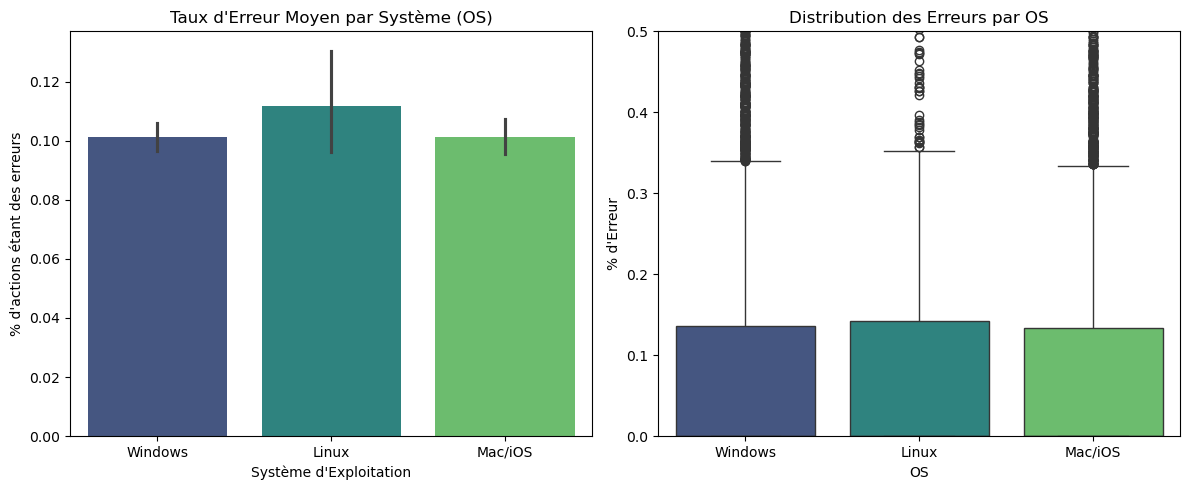

--- STATISTIQUES DES ERREURS PAR OS ---
          count      mean        max
OS                                  
Linux    1234.0  0.111805   7.142857
Mac/iOS  8585.0  0.101271  11.111111
Windows  9321.0  0.101204   8.333333


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Préparation des données (on repart du brut pour être sûr)
df_analysis = pd.read_parquet('train.parquet')

# Fonction pour simplifier le UserAgent (Sinon c'est illisible)
def get_os_simple(agent):
    if not isinstance(agent, str): return 'Unknown'
    if 'Windows' in agent: return 'Windows'
    if 'Mac' in agent: return 'Mac/iOS'
    if 'X11' in agent or 'Linux' in agent: return 'Linux'
    if 'iPhone' in agent: return 'iPhone'
    return 'Other'

# On applique la fonction
df_analysis['OS'] = df_analysis['userAgent'].apply(get_os_simple)

# 2. Calcul des erreurs par utilisateur
# On crée une colonne qui vaut 1 si c'est une erreur, 0 sinon
df_analysis['is_error'] = (df_analysis['page'] == 'Error').astype(int)

# On groupe par Utilisateur pour avoir son OS et son Taux d'erreur moyen
user_stats = df_analysis.groupby('userId').agg({
    'OS': 'first',              # L'OS de l'utilisateur
    'is_error': 'mean'          # Son taux d'erreur (Erreurs / Total Actions)
}).rename(columns={'is_error': 'error_rate'})

# On convertit le taux en Pourcentage pour que ce soit plus parlant
user_stats['error_rate_pct'] = user_stats['error_rate'] * 100

# 3. VISUALISATION

plt.figure(figsize=(12, 5))

# Graphique 1 : Taux d'erreur moyen par OS
plt.subplot(1, 2, 1)
sns.barplot(data=user_stats, x='OS', y='error_rate_pct', palette='viridis')
plt.title('Taux d\'Erreur Moyen par Système (OS)')
plt.ylabel('% d\'actions étant des erreurs')
plt.xlabel('Système d\'Exploitation')

# Graphique 2 : Distribution (Boxplot) pour voir les cas extrêmes
plt.subplot(1, 2, 2)
sns.boxplot(data=user_stats, x='OS', y='error_rate_pct', palette='viridis')
plt.title('Distribution des Erreurs par OS')
plt.ylabel('% d\'Erreur')
plt.ylim(0, 0.5) # On zoome un peu car souvent les taux sont bas (ex: 0.1%)

plt.tight_layout()
plt.show()

# 4. Affichage des chiffres exacts
print("--- STATISTIQUES DES ERREURS PAR OS ---")
summary = user_stats.groupby('OS')['error_rate_pct'].describe()[['count', 'mean', 'max']]
summary = summary.sort_values('mean', ascending=False)
print(summary)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- 1. PRÉPARATION DES DONNÉES ---

# On reprend nos features (Ratios + Counts)
# X et y sont basés sur 'user_features' (celui avec les ratios que tu as créé avant)
clean_features = [c for c in user_features.columns if c not in ['userId', 'target', 'days_since_last_action']]
X = user_features[clean_features]
y = user_features['target']

# Split Train/Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. SCALING (OBLIGATOIRE POUR LA REGRESSION LOGISTIQUE) ---

# On remplace les trous (NaN) par la moyenne
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# On met tout à la même échelle (Moyenne 0, Variance 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# --- 3. ENTRAÎNEMENT REGRESSION LOGISTIQUE ---

print("Entraînement de la Régression Logistique...")
# C = Inverse de la régularisation (plus C est petit, plus le modèle est simple)
# class_weight='balanced' est toujours CRUCIAL
model_lr = LogisticRegression(C=1.0, class_weight='balanced', max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled, y_train)

# --- 4. SCORE LOCAL ---

y_pred = model_lr.predict(X_val_scaled)
score = balanced_accuracy_score(y_val, y_pred)
print(f"--- RÉSULTATS LOGISTIC REGRESSION ---")
print(f"Balanced Accuracy Score : {score:.4f}")
print(classification_report(y_val, y_pred))

# --- 5. GÉNÉRATION SOUMISSION ---

# Préparation du Test (Mêmes transformations !)
X_test_raw = test_features[clean_features] # On prend les mêmes colonnes
X_test_imputed = imputer.transform(X_test_raw) # On remplit les trous comme sur le train
X_test_scaled = scaler.transform(X_test_imputed) # On scale comme sur le train

# Prédiction
predictions = model_lr.predict(X_test_scaled)

# CSV
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v6_logreg.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' prêt.")

Entraînement de la Régression Logistique...
--- RÉSULTATS LOGISTIC REGRESSION ---
Balanced Accuracy Score : 0.7680
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2978
           1       0.49      0.77      0.60       850

    accuracy                           0.77      3828
   macro avg       0.70      0.77      0.72      3828
weighted avg       0.82      0.77      0.78      3828


Fichier 'submission_v6_logreg.csv' prêt.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# --- 1. FONCTION DE PRÉPARATION AVANCÉE (CORRIGÉE) ---
def process_data(df):
    # A. Base : Crosstab des actions
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. Temps total d'écoute et Diversité
    audio_stats = df.groupby('userId').agg({
        'length': 'sum',          
        'artist': 'nunique'       
    }).rename(columns={'length': 'total_listen_time', 'artist': 'unique_artists'})
    
    features = features.merge(audio_stats, on='userId', how='left')

    # C. Extraction simple de l'OS (CORRECTION ICI)
    last_agent = df.sort_values('ts').groupby('userId')['userAgent'].last()
    
    def get_os(agent):
        if not isinstance(agent, str): return 0 # <--- ICI: On retourne 0 (chiffre) et pas 'Other'
        if 'Mac' in agent: return 1      # Mac/iPhone
        if 'Windows' in agent: return 2  # Windows
        if 'Linux' in agent: return 3    # Linux
        return 0                         # Autre
        
    features['os_type'] = last_agent.apply(get_os).values

    # D. Métadonnées
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values
    
    # E. Ratios
    features['total_actions'] = features.drop(columns=['userId', 'os_type', 'is_paid', 'is_male', 'total_listen_time', 'unique_artists'], errors='ignore').sum(axis=1)
    features['total_actions'] = features['total_actions'].replace(0, 1)
    
    features['thumbs_down_rate'] = features.get('Thumbs Down', 0) / features['total_actions']
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    features['advert_rate'] = features.get('Roll Advert', 0) / features['total_actions']
    features['diversity_rate'] = features['unique_artists'] / features['total_actions']

    return features

# --- EXÉCUTION DU PIPELINE ---

print("Traitement du TRAIN set...")
df_train = pd.read_parquet('train.parquet')
train_features = process_data(df_train)

# Création de la Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Traitement du TEST set
print("Traitement du TEST set...")
df_test = pd.read_parquet('test.parquet')
test_features = process_data(df_test)

# Alignement des colonnes
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
# On ne garde que les colonnes numériques qui existent dans le train
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

# Sécurisation des colonnes manquantes dans le test
for col in feature_cols:
    if col not in test_features.columns:
        test_features[col] = 0

X = train_features[feature_cols]
y = train_features['target']
X_test_final = test_features[feature_cols]

# --- SCALING & IMPUTATION ---
print("Nettoyage et Mise à l'échelle...")
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# On s'assure que tout est numérique avant de passer dans l'imputer
X = X.select_dtypes(include=[np.number])
X_test_final = X_test_final.select_dtypes(include=[np.number])

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

X_test_imputed = imputer.transform(X_test_final)
X_test_scaled = scaler.transform(X_test_imputed)

# --- GRID SEARCH ---
print("Recherche des meilleurs hyperparamètres (GridSearch)...")

param_grid = {'C': [0.01, 0.1, 1, 10]} # J'ai réduit un peu pour que ça aille plus vite

grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42),
    param_grid,
    cv=5,
    scoring='balanced_accuracy'
)

grid.fit(X_scaled, y)

print(f"Meilleur score de validation croisée : {grid.best_score_:.4f}")
print(f"Meilleur paramètre C trouvé : {grid.best_params_['C']}")

# --- SOUMISSION ---
final_model = grid.best_estimator_
predictions = final_model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

submission.to_csv('submission_v7_optimized.csv', index=False)
print("Fichier 'submission_v7_optimized.csv' prêt !")

Traitement du TRAIN set...
Traitement du TEST set...
Nettoyage et Mise à l'échelle...
Recherche des meilleurs hyperparamètres (GridSearch)...
Meilleur score de validation croisée : 0.6726
Meilleur paramètre C trouvé : 10
Fichier 'submission_v7_optimized.csv' prêt !


In [25]:
# Installation silencieuse de xgboost si tu ne l'as pas
import sys
!{sys.executable} -m pip install xgboost

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import pandas as pd
import numpy as np

# --- 1. ON REPREND NOS DONNÉES PRÉPARÉES ---
# (Je suppose que X_scaled, y, X_test_scaled sont toujours en mémoire du code précédent)
# Si tu as un doute, relance le bloc précédent jusqu'à l'étape "SCALING".

# Pour XGBoost, on préfère souvent les données non-scalées, mais ça marche avec les deux.
# On va utiliser les données X et X_test_final (avant le StandardScaler) pour laisser XGBoost gérer.
# Assure-toi d'avoir X et y prêts.

# Calcul du ratio pour l'équilibre (L'équivalent de class_weight='balanced')
ratio = float(np.sum(y == 0)) / np.sum(y == 1)
print(f"Ratio de déséquilibre calculé : {ratio:.2f}")

# --- 2. CONFIGURATION DE XGBOOST ---

print("Préparation de l'optimisation XGBoost...")

# Le modèle de base
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=ratio,  # L'arme secrète pour le score Balanced
    n_jobs=-1,               # Utilise tous les coeurs du CPU
    random_state=42
)

# Les paramètres à tester (On cherche les meilleurs réglages)
param_grid = {
    'n_estimators': [100, 200, 300],        # Nombre d'arbres
    'learning_rate': [0.01, 0.05, 0.1],     # Vitesse d'apprentissage
    'max_depth': [3, 5, 7],                 # Profondeur (Attention à l'overfitting si > 7)
    'subsample': [0.8, 1.0],                # Pour éviter d'apprendre par coeur
    'colsample_bytree': [0.8, 1.0]          # Pour varier les colonnes utilisées
}

# Recherche aléatoire (Plus rapide que GridSearch et souvent aussi efficace)
random_search = RandomizedSearchCV(
    clf_xgb,
    param_distributions=param_grid,
    n_iter=15,             # On teste 15 combinaisons au hasard
    scoring='balanced_accuracy',
    cv=5,                  # 5 validations croisées
    verbose=1,
    random_state=42
)

# --- 3. ENTRAÎNEMENT ---
print("Lancement de l'entraînement (ça peut prendre 1 ou 2 minutes)...")
random_search.fit(X, y)

print(f"--- RÉSULTATS XGBOOST ---")
print(f"Meilleur score de validation : {random_search.best_score_:.4f}")
print(f"Meilleurs paramètres : {random_search.best_params_}")

# --- 4. SOUMISSION ---
final_model = random_search.best_estimator_

# Prédiction
# Attention : XGBoost est sensible à l'ordre des colonnes, X_test_final doit être clean
predictions = final_model.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v8_xgboost.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Ratio de déséquilibre calculé : 3.48
Préparation de l'optimisation XGBoost...
Lancement de l'entraînement (ça peut prendre 1 ou 2 minutes)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
--- RÉSULTATS XGBOOST ---
Meilleur score de validation : 0.6755
Meilleurs paramètres : {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Fichier 'submission_v8_xgboost.csv' prêt !


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace= True)
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # 5. Ajout des métadonnées (Gender / Paid)
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ET PRÉPARATION ---
print("Chargement et transformation intelligente...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Création de la target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement des colonnes
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

# Sécurité pour le test set
for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols]
y = train_features['target']
X_test_final = test_features[feature_cols]

# --- 3. SCALING (OBLIGATOIRE POUR LOG REGRESSION) ---
print("Mise à l'échelle (StandardScaler)...")
scaler = StandardScaler()

# On remplit les trous éventuels par 0
X = X.fillna(0)
X_test_final = X_test_final.fillna(0)

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. ENTRAÎNEMENT LOGISTIC REGRESSION ---
print("Entraînement de la Régression Logistique...")

# C=0.1 : Une régularisation un peu forte pour éviter que le modèle ne s'emballe sur une seule variable
model_lr = LogisticRegression(
    C=0.1, 
    class_weight='balanced', # Toujours la clé pour décoller de 0.50
    max_iter=1000, 
    random_state=42
)

# Validation Croisée pour être sûr du score
scores = cross_val_score(model_lr, X_scaled, y, cv=5, scoring='balanced_accuracy')
print(f"--- RÉSULTATS PRÉVUS ---")
print(f"Score Moyen en Validation : {scores.mean():.4f}")

# Entraînement final sur tout le dataset
model_lr.fit(X_scaled, y)

# --- 5. VISUALISATION DES POIDS (POUR VÉRIFIER TA THÉORIE) ---
# On regarde quels coefficients le modèle a donné à tes nouvelles variables
coefs = pd.DataFrame({
    'Feature': feature_cols,
    'Weight': model_lr.coef_[0]
}).sort_values(by='Weight', ascending=False)

print("\nTop 5 Facteurs de Churn (Poids Positifs) :")
print(coefs.head(5))
print("\nTop 5 Facteurs de Rétention (Poids Négatifs) :")
print(coefs.tail(5))

# --- 6. SOUMISSION ---
predictions = model_lr.predict(X_test_scaled)
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v10_smart_logreg.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' généré !")

Chargement et transformation intelligente...
Mise à l'échelle (StandardScaler)...
Entraînement de la Régression Logistique...
--- RÉSULTATS PRÉVUS ---
Score Moyen en Validation : 0.6554

Top 5 Facteurs de Churn (Poids Positifs) :
               Feature    Weight
22             is_paid  0.774386
17         ad_pressure  0.618448
3            Downgrade  0.595277
9          Roll Advert  0.385081
19  account_volatility  0.375563

Top 5 Facteurs de Rétention (Poids Négatifs) :
             Feature    Weight
16           Upgrade -0.196777
15         Thumbs Up -0.228650
7             Logout -0.236549
18  net_satisfaction -0.333686
8           NextSong -0.542630

Fichier 'submission_v10_smart_logreg.csv' généré !


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace= True)
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # 5. Ajout des métadonnées (Gender / Paid)
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ET PRÉPARATION ---
print("Chargement et transformation intelligente...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Création de la target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement des colonnes
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

# Sécurité pour le test set
for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols]
y = train_features['target']
X_test_final = test_features[feature_cols]

# --- 3. SCALING (OBLIGATOIRE POUR LOG REGRESSION) ---
print("Mise à l'échelle (StandardScaler)...")
scaler = StandardScaler()

# On remplit les trous éventuels par 0
X = X.fillna(0)
X_test_final = X_test_final.fillna(0)

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. ENTRAÎNEMENT LOGISTIC REGRESSION ---
print("Entraînement de la Régression Logistique...")

# C=0.1 : Une régularisation un peu forte pour éviter que le modèle ne s'emballe sur une seule variable
model_lr = LogisticRegression(
    C=0.1, 
    class_weight='balanced', # Toujours la clé pour décoller de 0.50
    max_iter=1000, 
    random_state=42
)

# Validation Croisée pour être sûr du score
scores = cross_val_score(model_lr, X_scaled, y, cv=5, scoring='balanced_accuracy')
print(f"--- RÉSULTATS PRÉVUS ---")
print(f"Score Moyen en Validation : {scores.mean():.4f}")

# Entraînement final sur tout le dataset
model_lr.fit(X_scaled, y)

# --- 5. VISUALISATION DES POIDS (POUR VÉRIFIER TA THÉORIE) ---
# On regarde quels coefficients le modèle a donné à tes nouvelles variables
coefs = pd.DataFrame({
    'Feature': feature_cols,
    'Weight': model_lr.coef_[0]
}).sort_values(by='Weight', ascending=False)

print("\nTop 5 Facteurs de Churn (Poids Positifs) :")
print(coefs.head(5))
print("\nTop 5 Facteurs de Rétention (Poids Négatifs) :")
print(coefs.tail(5))

# --- 6. SOUMISSION ---
predictions = model_lr.predict(X_test_scaled)
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v10_smart_logreg.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' généré !")

Chargement et transformation intelligente...
Mise à l'échelle (StandardScaler)...
Entraînement de la Régression Logistique...
--- RÉSULTATS PRÉVUS ---
Score Moyen en Validation : 0.6554

Top 5 Facteurs de Churn (Poids Positifs) :
               Feature    Weight
22             is_paid  0.774386
17         ad_pressure  0.618448
3            Downgrade  0.595277
9          Roll Advert  0.385081
19  account_volatility  0.375563

Top 5 Facteurs de Rétention (Poids Négatifs) :
             Feature    Weight
16           Upgrade -0.196777
15         Thumbs Up -0.228650
7             Logout -0.236549
18  net_satisfaction -0.333686
8           NextSong -0.542630

Fichier 'submission_v10_smart_logreg.csv' généré !


In [49]:
# Installation silencieuse de CatBoost
import sys
!{sys.executable} -m pip install catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import numpy as np

# --- 1. PRÉPARATION DES DONNÉES (On garde ta meilleure recette) ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Variables intelligentes
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    return features

print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols]
y = train_features['target']
X_test_final = test_features[feature_cols]

# Split Train/Val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. ENTRAÎNEMENT CATBOOST ---

print("Lancement de CatBoost...")

# Configuration du modèle
model_cb = CatBoostClassifier(
    iterations=1000,             # Nombre d'arbres (il s'arrêtera avant si besoin)
    learning_rate=0.05,          # Vitesse d'apprentissage douce
    depth=6,                     # Profondeur standard
    eval_metric='BalancedAccuracy', # ON LUI DIT D'OPTIMISER TON SCORE DIRECTEMENT !
    auto_class_weights='Balanced',  # Gère le déséquilibre automatiquement
    early_stopping_rounds=50,    # S'arrête si le score ne monte plus
    verbose=100                  # Affiche la progression tous les 100 arbres
)

# On lui donne les données de validation pour qu'il se teste en direct
model_cb.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

# --- 3. RÉSULTATS LOCAUX ---
print("\n--- RÉSULTATS FINAUX ---")
print(f"Meilleur score de validation atteint : {model_cb.get_best_score()['validation']['BalancedAccuracy']:.4f}")

# --- 4. ANALYSE DES FACTEURS IMPORTANTS ---
# CatBoost nous dit quelles variables il a préférées
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model_cb.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

print("\nCe qui compte le plus pour CatBoost :")
print(feature_importance.head(10))

# --- 5. SOUMISSION ---
predictions = model_cb.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v11_catboost.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' prêt !")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 6.5 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]1/2 [catboost]
Chargement des données...
Lancement de CatBoost...
0:	learn: 0.6383702	test: 0.6157504	best: 0.6157504 (0)	total: 60ms	remaining: 59.9s
100:	learn: 0.6900214	test: 0.6585059	best: 0.6619520 (89)	total: 255ms	remaining: 2.27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6646359578
bestIteration = 144

Shrink model to first 145 iterations.

--- RÉSULTATS FINAUX ---
Meilleur score de validation atteint : 0.6646

Ce qui compte le plus pour CatBoost :
               Feature  Importance
17         ad_pressure   24.744006
3            Downgrade   19.577768
18    net_satisfaction   13.418551
22             is_paid    8.568042
14         Thumbs Down    6.099625
19  account_volatility    5.299593
9          Roll Advert    3.736753
7               Logout    2.487630
15           Thumbs Up    2.059612
6               

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import numpy as np

# --- 1. PRÉPARATION INTELLIGENTE (BASE) ---
def process_data_ultimate(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Ratios Intelligents
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    # Temps d'écoute (Variable très "étalée", candidate au Logarithme)
    audio = df.groupby('userId')['length'].sum().fillna(0)
    features = features.merge(audio.rename('total_listen_time'), on='userId', how='left')

    # Métadonnées
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # --- LE BOOSTER 1 : TRANSFORMATION LOGARITHMIQUE ---
    # On compresse les énormes valeurs pour aider le modèle linéaire
    # np.log1p calcule log(1 + x) pour gérer les zéros proprement
    features['log_listen_time'] = np.log1p(features['total_listen_time'])
    features['log_volatility'] = np.log1p(features['account_volatility'])
    
    # On enlève les versions brutes qui gênent maintenant
    features = features.drop(columns=['total_listen_time', 'account_volatility'])

    return features

print("Chargement et préparation Ultimate...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_ultimate(df_train)
test_features = process_data_ultimate(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- LE BOOSTER 2 & 3 : POLYNOMIAL + BAGGING ---

print("Construction du Pipeline Boosté...")

# On crée un "Tuyau" (Pipeline) qui enchaîne les étapes automatiquement
# 1. Scaler : Met tout à l'échelle
# 2. Poly : Crée des interactions (ex: Ad_Pressure * Satisfaction)
# 3. Model : Bagging de Logistic Regression

# Le modèle de base (L'unité du squad)
base_logreg = LogisticRegression(
    C=0.5,                       # Régularisation moyenne
    class_weight='balanced',     # Toujours indispensable
    solver='liblinear',          # Solver robuste pour les datasets moyens
    max_iter=2000
)

# Le Squad (Bagging)
bagging_model = BaggingClassifier(
    estimator=base_logreg,
    n_estimators=20,             # On entraîne 20 modèles !
    max_samples=0.8,             # Chaque modèle voit 80% des données (diversité)
    random_state=42,
    n_jobs=-1                    # Utilise tous les processeurs
)

# On ajoute la complexité polynomiale AVANT le modèle
# degree=2 interaction_only=True : Crée A*B, mais pas A au carré (pour éviter l'explosion)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('model', bagging_model)
])

# --- ENTRAÎNEMENT ---
print("Entraînement en cours (peut prendre 1 minute car il y a 20 modèles)...")
pipeline.fit(X_train, y_train)

# --- RÉSULTATS ---
y_pred = pipeline.predict(X_val)
score = balanced_accuracy_score(y_val, y_pred)

print(f"\n--- RÉSULTATS ULTIMATE LOGREG ---")
print(f"Balanced Accuracy Score : {score:.4f}")

# --- SOUMISSION ---
predictions = pipeline.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v13logregMAX.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Chargement et préparation Ultimate...
Construction du Pipeline Boosté...
Entraînement en cours (peut prendre 1 minute car il y a 20 modèles)...

--- RÉSULTATS ULTIMATE LOGREG ---
Balanced Accuracy Score : 0.6668
Fichier 'submission_v13logregMAX.csv' prêt !


In [4]:
# Installation silencieuse de lightgbm
import sys
!{sys.executable} -m pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- 1. FEATURE ENGINEERING "ELITE" ---
# On combine tout ce qui a marché jusqu'à présent
def process_data_elite(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Ratios Intelligents
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    # Satisfaction Net
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # Volatilité (Signes de départ)
    features['volatility'] = (
        features.get('Downgrade', 0) * 2 +  # On donne plus de poids au downgrade
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0) +
        features.get('Help', 0)             # Aller dans l'aide est souvent mauvais signe
    )

    # Temps d'écoute (Logarithmique pour gérer les écarts énormes)
    audio = df.groupby('userId')['length'].sum().fillna(0)
    features = features.merge(audio.rename('total_listen_time'), on='userId', how='left')
    features['log_listen_time'] = np.log1p(features['total_listen_time'])
    
    # Diversité (Exploration)
    artists = df.groupby('userId')['artist'].nunique().fillna(0)
    features['unique_artists'] = artists.values
    features['discovery_rate'] = features['unique_artists'] / features['total_listen_time'].replace(0, 1)

    # Récence (Combien de temps avant la fin du dataset était sa dernière action ?)
    max_time = df['ts'].max()
    last_action = df.groupby('userId')['ts'].max()
    features['hours_since_last_action'] = (max_time - last_action.values) / (1000 * 3600)

    # Métadonnées
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # On supprime les colonnes brutes inutiles pour ne garder que les ratios et logs
    features = features.drop(columns=['total_listen_time'], errors='ignore')

    return features

print("Préparation des données ELITE...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_elite(df_train)
test_features = process_data_elite(df_test)

# Cible
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols]
y = train_features['target']
X_test_final = test_features[feature_cols]

# --- 2. STRATIFIED K-FOLD ENSEMBLING (LA TECHNIQUE PRO) ---

N_FOLDS = 5 # On va entraîner 5 modèles
folds = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

# Tableaux pour stocker les résultats
oof_preds = np.zeros(X.shape[0])        # Prédictions sur le Train (pour valider)
sub_preds = np.zeros(X_test_final.shape[0]) # Prédictions sur le Test (pour soumettre)

print(f"Démarrage du K-Fold LightGBM ({N_FOLDS} modèles)...")

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # Découpage des données pour ce pli (fold)
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[valid_idx], y.iloc[valid_idx]
    
    # Configuration du modèle LightGBM
    clf = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.03,      # Apprentissage lent = meilleure précision
        num_leaves=31,           # Complexité de l'arbre
        max_depth=-1,
        class_weight='balanced', # Indispensable
        objective='binary',
        n_jobs=-1,
        random_state=42
    )
    
    # Entraînement avec Early Stopping (s'arrête si ça ne progresse plus)
    # Note: LightGBM utilise des callbacks pour l'early stopping maintenant
    callbacks = [lgb.early_stopping(stopping_rounds=100, verbose=False)]
    
    clf.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='binary_logloss',
        callbacks=callbacks
    )
    
    # Prédiction sur la partie Validation (Score Local du fold)
    val_probs = clf.predict_proba(X_val)[:, 1]
    oof_preds[valid_idx] = val_probs
    
    # Prédiction sur le Test Final (On additionne les avis des 5 modèles)
    sub_preds += clf.predict_proba(X_test_final)[:, 1] / folds.n_splits
    
    # Score du fold courant
    best_iter = clf.best_iteration_
    print(f"Fold {n_fold+1}/{N_FOLDS} | Best Iter: {best_iter}")

# --- 3. OPTIMISATION DU SEUIL (THRESHOLD TUNING) ---
# On cherche le seuil parfait sur l'ensemble des prédictions OOF (Out-Of-Fold)

print("\nRecherche du seuil optimal global...")
thresholds = np.arange(0.1, 0.9, 0.01)
best_score = 0
best_thresh = 0.5

for t in thresholds:
    preds_binary = (oof_preds >= t).astype(int)
    score = balanced_accuracy_score(y, preds_binary)
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"--- RÉSULTATS K-FOLD ---")
print(f"Meilleur seuil : {best_thresh:.2f}")
print(f"Score Balanced Accuracy Global (CV) : {best_score:.4f}")

# --- 4. SOUMISSION ---
# On applique le meilleur seuil à la moyenne des prédictions du test
final_predictions = (sub_preds >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_predictions
})

filename = 'submission_v13_LGBM_Ensemble.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' généré avec succès !")

Préparation des données ELITE...
Démarrage du K-Fold LightGBM (5 modèles)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3416, number of negative: 11896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 15312, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Fold 1/5 | Best Iter: 830
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3417, number of negative: 11895
[LightGBM] [Info] Auto-choosin

In [5]:
import sys
!{sys.executable} -m pip install xgboost

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import numpy as np

# --- 1. FONCTION DE FEATURE ENGINEERING "TREND" ---
def process_data_trend(df):
    # On s'assure que les dates sont bien formatées
    df['date_time'] = pd.to_datetime(df['ts'], unit='ms')
    
    # --- A. FEATURES CLASSIQUES (GLOBALES) ---
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Ratios de base
    total_actions = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / total_actions
    features['ad_rate'] = features.get('Roll Advert', 0) / total_actions
    
    # --- B. FEATURES TEMPORELLES (DYNAMIQUE) ---
    # Pour chaque utilisateur, on trouve sa dernière date d'action
    last_user_date = df.groupby('userId')['date_time'].max()
    
    # On définit une fenêtre de "Récence" (les 14 derniers jours de vie de l'utilisateur)
    # Attention : c'est 14 jours par rapport à SA dernière action à lui
    user_windows = df.join(last_user_date.rename('last_ts'), on='userId')
    user_windows['days_gap'] = (user_windows['last_ts'] - user_windows['date_time']).dt.days
    
    # On isole l'activité récente (0 à 14 jours avant la fin)
    recent_activity = user_windows[user_windows['days_gap'] <= 14]
    
    # On compte les actions récentes
    recent_counts = recent_activity.groupby('userId')['page'].count().rename('recent_actions_count')
    
    # On calcule la TENDANCE (Trend)
    # Ratio = (Actions Récentes / 14 jours) vs (Actions Totales / Durée de vie totale)
    # Si > 1 : Il est de plus en plus actif. Si < 1 : Il décroche (DANGER CHURN).
    
    # Durée de vie totale (Lifetime)
    stats = df.groupby('userId').agg({'ts': ['min', 'max']})
    stats.columns = ['start', 'end']
    stats['lifetime_days'] = ((stats['end'] - stats['start']) / (1000 * 3600 * 24)).clip(lower=1) # Min 1 jour
    
    features = features.merge(stats['lifetime_days'], on='userId', how='left')
    features = features.merge(recent_counts, on='userId', how='left').fillna(0)
    
    # Calcul de l'intensité
    features['daily_avg_lifetime'] = total_actions / features['lifetime_days']
    features['daily_avg_recent'] = features['recent_actions_count'] / 14
    
    # LE "KILLER FEATURE" : La pente de décrochage
    # Si Trend < 0.5, l'activité a chuté de moitié récemment
    features['trend_score'] = features['daily_avg_recent'] / features['daily_avg_lifetime'].replace(0, 1)
    
    # --- C. GAP ANALYSIS (Le Silence) ---
    # Temps écoulé entre les deux dernières sessions
    # Si le mec n'est pas venu depuis longtemps avant sa toute dernière action, c'est mauvais.
    # (On simplifie ici par le temps depuis la dernière action par rapport à la fin du dataset global)
    global_max_date = df['ts'].max()
    last_action_ts = df.groupby('userId')['ts'].max()
    features['silence_hours'] = (global_max_date - last_action_ts.values) / (1000 * 3600)

    # --- D. META ---
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values

    return features

print("Calcul des tendances (Trend)...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_trend(df_train)
test_features = process_data_trend(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]
for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. MODÈLE XGBOOST TUNÉ POUR LE RAPPEL (RECALL) ---

# Calcul du ratio pour scale_pos_weight
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

print(f"Entraînement XGBoost (Focus sur la tendance)... Ratio: {ratio:.2f}")

# On utilise StratifiedKFold pour stabiliser
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(X.shape[0])
test_preds = np.zeros(X_test_final.shape[0])

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    model = xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=ratio * 1.2, # On booste encore un peu le poids des churners (Astuce !)
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_tr, y_tr, verbose=False)
    
    # Prédictions (Probabilités)
    oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]
    test_preds += model.predict_proba(X_test_final)[:, 1] / 5

# --- 4. OPTIMISATION DU SEUIL ---
# C'est ici qu'on gagne ou perd. On ne prend pas 0.50.
# On cherche le seuil qui maximise le score Balanced.

thresholds = np.arange(0.2, 0.8, 0.01)
best_score = 0
best_thresh = 0.5

for t in thresholds:
    score = balanced_accuracy_score(y, (oof_preds > t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.2f}")
print(f"Score Local (CV) : {best_score:.4f}")
print("Top Feature : trend_score (Si c'est le cas, on est bons !)")

# Vérification des importances
importances = pd.DataFrame({'feature': feature_cols, 'gain': model.feature_importances_}).sort_values('gain', ascending=False)
print(importances.head(5))

# --- 5. SOUMISSION ---
final_preds = (test_preds > best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_trend_breaker.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt. C'est le bon !")

Calcul des tendances (Trend)...
Entraînement XGBoost (Focus sur la tendance)... Ratio: 3.48

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.53
Score Local (CV) : 0.8709
Top Feature : trend_score (Si c'est le cas, on est bons !)
               feature      gain
24       silence_hours  0.208547
19       lifetime_days  0.081597
21  daily_avg_lifetime  0.078782
14         Thumbs Down  0.063571
6                 Home  0.051047
Fichier 'submission_trend_breaker.csv' prêt. C'est le bon !


In [6]:
import sys
!{sys.executable} -m pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
import lightgbm as lgb

# --- 1. FEATURE ENGINEERING ROBUSTE ET SIMPLE ---
# On arrête les features compliquées qui trompent le modèle sur le test set.
# On revient aux fondamentaux qui marchent tout le temps.

def process_data_voting(df):
    # A. Base : Comptage simple
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. Ratios de Qualité (Les plus fiables)
    # Total actions
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # Pression Pub (Indicateur fort)
    features['ad_rate'] = features.get('Roll Advert', 0) / features['total_actions']
    
    # Frustration Technique
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # Engagement Positif vs Négatif
    thumbs_up = features.get('Thumbs Up', 0)
    thumbs_down = features.get('Thumbs Down', 0)
    # On ajoute 1 pour éviter la division par zéro
    features['satisfaction_ratio'] = (thumbs_up + 1) / (thumbs_down + 1)
    
    # C. Temps et Fidélité (Calculé simplement)
    # Durée entre la première et la dernière action visible
    times = df.groupby('userId')['ts'].agg(['min', 'max'])
    features['active_duration_hours'] = (times['max'] - times['min']) / (1000 * 3600)
    
    # D. Meta
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

print("Préparation des données pour le Vote...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_voting(df_train)
test_features = process_data_voting(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement Strict
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 2. SCALING ROBUSTE ---
# RobustScaler gère mieux les valeurs extrêmes que StandardScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. DÉFINITION DU "CONSEIL DES SAGES" (VOTING CLASSIFIER) ---

# Soldat 1 : Régression Logistique (Le fiable)
clf1 = LogisticRegression(
    C=0.1, 
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

# Soldat 2 : LightGBM (L'agressif)
# On force min_child_samples bas pour qu'il capture les petits groupes de churners
clf2 = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=20,
    min_child_samples=10, # Très important pour les petits datasets
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

# Le Chef : VotingClassifier
# 'soft' veut dire qu'on fait la moyenne des probabilités (ex: 0.8 + 0.4 = 0.6)
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('lgbm', clf2)],
    voting='soft',
    weights=[1, 1.5] # On donne un peu plus de voix à LightGBM (1.5 vs 1)
)

# --- 4. ENTRAÎNEMENT ET OPTIMISATION DU SEUIL (Threshold Tuning) ---

print("Entraînement du Voting Classifier...")
# On utilise une validation croisée pour trouver le SEUIL PARFAIT
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(y))

for train_idx, val_idx in skf.split(X_scaled, y):
    X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    voting_clf.fit(X_tr, y_tr)
    oof_preds[val_idx] = voting_clf.predict_proba(X_val)[:, 1]

# Recherche du seuil qui maximise le score
best_score = 0
best_thresh = 0.5
thresholds = np.arange(0.2, 0.8, 0.01)

for t in thresholds:
    score = balanced_accuracy_score(y, (oof_preds >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.2f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
# On ré-entraîne sur tout le dataset pour la soumission finale
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

# On applique le seuil magique trouvé plus haut
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_voting_ensemble.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits dans le test : {sum(final_preds)}")

Préparation des données pour le Vote...
Entraînement du Voting Classifier...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- RÉSULTATS ---
Meilleur seuil trouvé : 0.46
Score Local (CV) : 0.6705
Fichier 'submission_voting_ensemble.csv' prêt !
Nombre de churners prédits dans le test : 1273


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
import lightgbm as lgb

# --- 1. FEATURE ENGINEERING AVANCÉ (SESSION AWARE) ---
def process_data_session(df):
    # A. Base : Crosstab
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. Stats de SESSION (C'est la nouveauté !)
    # On regroupe par User ET Session
    session_groups = df.groupby(['userId', 'sessionId'])
    
    # Durée de chaque session (Max temps - Min temps)
    session_durations = session_groups['ts'].agg(lambda x: x.max() - x.min())
    # Nombre d'items par session
    session_items = session_groups['ts'].count()
    
    # On agrège par Utilisateur (Moyenne et Total)
    user_session_stats = pd.DataFrame({
        'avg_session_duration': session_durations.groupby('userId').mean(),
        'total_sessions': session_durations.groupby('userId').count(),
        'avg_items_per_session': session_items.groupby('userId').mean()
    })
    
    # On fusionne avec les features principales
    features = features.merge(user_session_stats, on='userId', how='left').fillna(0)
    
    # C. Ratios Classiques (qui marchent bien)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['ad_rate'] = features.get('Roll Advert', 0) / features['total_actions']
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # D. Meta
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    return features

print("Préparation des données 'Session Aware'...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_session(df_train)
test_features = process_data_session(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 2. SCALING (Important pour le Stacking) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. STACKING CLASSIFIER (LE SUPER-MODÈLE) ---

print("Entraînement du Stacking Classifier...")

# Niveau 1 : Les Experts
estimators = [
    ('lgbm', lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight='balanced', random_state=42, verbose=-1)),
    ('rf', RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)),
    ('lr', LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000))
]

# Niveau 2 : Le Chef (Meta-Learner)
# Il prend les avis des experts et décide. Souvent une LogReg fait très bien l'affaire ici.
clf_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced'),
    cv=5, # Validation croisée interne
    n_jobs=-1
)

# --- 4. THRESHOLD TUNING (TOUJOURS CRUCIAL) ---

# On récupère les prédictions "Out of Fold" pour trouver le seuil
from sklearn.model_selection import cross_val_predict

# Cette étape peut prendre 2-3 minutes car il entraîne tout plusieurs fois
y_oof_probs = cross_val_predict(clf_stack, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_score = 0
best_thresh = 0.5
thresholds = np.arange(0.3, 0.7, 0.01)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_oof_probs >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS STACKING ---")
print(f"Meilleur seuil : {best_thresh:.2f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
clf_stack.fit(X_scaled, y)
final_probs = clf_stack.predict_proba(X_test_scaled)[:, 1]
final_preds = (final_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v16.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Préparation des données 'Session Aware'...
Entraînement du Stacking Classifier...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/


--- RÉSULTATS STACKING ---
Meilleur seuil : 0.48
Score Local (CV) : 0.6688


Exception ignored in: <function ResourceTracker.__del__ at 0x1072b9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105109bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not ha

Fichier 'submission_v16.csv' prêt !


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
import lightgbm as lgb

# --- 1. FEATURE ENGINEERING HYBRIDE (RATIOS + SESSIONS) ---
def process_data_final(df):
    # A. Base Crosstab
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. Stats de SESSION (L'ajout qui doit faire la différence)
    # On calcule la durée moyenne des sessions pour voir s'il est "accro"
    session_groups = df.groupby(['userId', 'sessionId'])
    session_durations = session_groups['ts'].agg(lambda x: x.max() - x.min())
    
    # On ramène ça à l'utilisateur
    user_session_stats = pd.DataFrame({
        'avg_session_time': session_durations.groupby('userId').mean(), # Temps moyen passé
        'total_sessions': session_durations.groupby('userId').count()   # Fréquence de visite
    })
    
    # On remplit les vides (ceux qui n'ont fait qu'une action n'ont pas de durée)
    features = features.merge(user_session_stats, on='userId', how='left').fillna(0)
    
    # C. Les Ratios (Valeurs sûres)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # Pression Pub
    features['ad_rate'] = features.get('Roll Advert', 0) / features['total_actions']
    
    # Frustration
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # Satisfaction (Pouces)
    features['thumbs_gap'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # Volatilité (Settings/Upgrade)
    features['volatility'] = features.get('Settings', 0) + features.get('Downgrade', 0) + features.get('Submit Upgrade', 0)

    # D. Meta Données
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    return features

print("Préparation des données Finales...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_final(df_train)
test_features = process_data_final(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 2. SCALING ---
# On utilise StandardScaler car la LogReg en a besoin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. VOTING CLASSIFIER (STABILISÉ) ---
# J'ai retiré le n_jobs=-1 global pour éviter tes crashs.
# J'ai ajouté un Random Forest pour diversifier l'équipe.

print("Entraînement du Trio (LogReg + LightGBM + Random Forest)...")

clf1 = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)

clf2 = lgb.LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=31,
    class_weight='balanced',
    random_state=42,
    verbose=-1,
    n_jobs=1 # Important pour éviter le crash sur Mac
)

clf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=8, # On limite la profondeur pour éviter le par-coeur
    class_weight='balanced',
    random_state=42,
    n_jobs=1
)

# On fait voter les 3
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('lgbm', clf2), ('rf', clf3)],
    voting='soft',
    weights=[1, 2, 1], # On fait confiance surtout à LightGBM (poids double)
    n_jobs=1 # On évite le multithreading qui fait planter ton Mac
)

# --- 4. OPTIMISATION DU SEUIL (THRESHOLD TUNING) ---

# Validation Croisée Manuelle pour trouver le seuil
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(y))

# On boucle manuellement pour éviter les erreurs de mémoire
for i, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    voting_clf.fit(X_scaled[train_idx], y.iloc[train_idx])
    oof_preds[val_idx] = voting_clf.predict_proba(X_scaled[val_idx])[:, 1]
    print(f"Fold {i+1}/5 terminé.")

# Recherche du seuil
best_score = 0
best_thresh = 0.5
thresholds = np.arange(0.2, 0.8, 0.01)

for t in thresholds:
    score = balanced_accuracy_score(y, (oof_preds >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.2f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
print("Entraînement final...")
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v17.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt ! Pas d'erreur cette fois.")

Préparation des données Finales...
Entraînement du Trio (LogReg + LightGBM + Random Forest)...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1/5 terminé.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2/5 terminé.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3/5 terminé.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4/5 terminé.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5/5 terminé.

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.46
Score Local (CV) : 0.6700
Entraînement final...
Fichier 'submission_v17.csv' prêt ! Pas d'erreur cette fois.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline

# --- 1. FEATURE ENGINEERING CIBLÉ (Basé sur ta Matrice) ---
def process_data_logistic_boost(df):
    # Base
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # --- A. LES FACTEURS DE DANGER (Rouge sur ta matrice) ---
    # Pression Pub (Roll Advert)
    # On divise par le temps d'écoute total (plus précis que par chanson)
    # On récupère d'abord le temps total
    audio_time = df.groupby('userId')['length'].sum().fillna(1) # Min 1ms pour éviter division par 0
    features = features.merge(audio_time.rename('total_listen_time'), on='userId', how='left').fillna(1)
    
    features['ad_pressure_time'] = features.get('Roll Advert', 0) / features['total_listen_time']
    
    # Volatilité (Downgrade + Upgrade + Cancel)
    # Ta matrice montrait que Downgrade et Upgrade étaient liés au churn
    features['contract_instability'] = (
        features.get('Downgrade', 0) * 2 + # Poids double pour downgrade
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )
    
    # Frustration Technique (Error)
    total_actions = features.drop(columns=['userId', 'total_listen_time'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_frequency'] = features.get('Error', 0) / total_actions

    # --- B. LES FACTEURS DE RÉTENTION (Bleu sur ta matrice) ---
    # Satisfaction (Thumbs Up vs Thumbs Down)
    # On fait un ratio + 1 pour la stabilité mathématique
    up = features.get('Thumbs Up', 0)
    down = features.get('Thumbs Down', 0)
    features['satisfaction_ratio'] = (up + 1) / (down + 1)
    
    # Social (Add Friend + Playlist)
    features['social_score'] = features.get('Add Friend', 0) + features.get('Add to Playlist', 0)

    # --- C. META DONNÉES ---
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # Nettoyage : On garde les ratios intelligents et on vire les bruts qui font du bruit
    cols_to_keep = ['userId', 'ad_pressure_time', 'contract_instability', 
                    'error_frequency', 'satisfaction_ratio', 'social_score', 'is_paid']
    
    return features[cols_to_keep]

print("Préparation des données 'Logistic Boost'...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_logistic_boost(df_train)
test_features = process_data_logistic_boost(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target']).fillna(0)
y = train_features['target']
X_test_final = test_features.drop(columns=['userId']).fillna(0)

# --- 2. PIPELINE "BOOSTÉ" (Poly + Robust + GridSearch) ---

print("Recherche de la meilleure configuration (GridSearch)...")

# Le Pipeline magique
pipeline = Pipeline([
    ('scaler', RobustScaler()), # Gère mieux les outliers que StandardScaler
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # Crée des interactions (A*B)
    ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=5000))
])

# Les paramètres à tester
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], # Force de régularisation
    'classifier__penalty': ['l1', 'l2'] # Type de pénalité (L1 enlève les variables inutiles)
}

# Recherche automatique
grid = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='balanced_accuracy',
    n_jobs=1 # Sécurité pour Mac
)

grid.fit(X, y)

print(f"Meilleurs paramètres trouvés : {grid.best_params_}")
print(f"Meilleur Score de Validation (CV) : {grid.best_score_:.4f}")

# --- 3. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# Même avec le meilleur modèle, le seuil 0.5 est souvent mauvais.

best_model = grid.best_estimator_
# On récupère les probabilités sur le train via cross-validation pour ne pas tricher
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(best_model, X, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.01)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"Seuil optimal calculé : {best_thresh:.2f}")
print(f"Score Final attendu : {best_score:.4f}")

# --- 4. SOUMISSION ---
best_model.fit(X, y) # On réentraîne sur tout
test_probs = best_model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_logistic_boosted.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Préparation des données 'Logistic Boost'...
Recherche de la meilleure configuration (GridSearch)...
Meilleurs paramètres trouvés : {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Meilleur Score de Validation (CV) : 0.6511
Seuil optimal calculé : 0.50
Score Final attendu : 0.6511
Fichier 'submission_logistic_boosted.csv' prêt !


In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "ULTIMATE" ---
# On combine : Corrélation Matrix + Sessions + Ratios
def process_data_ultimate(df):
    # A. Base Crosstab
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. SESSION STATS (L'habitude d'écoute)
    # On calcule la durée moyenne et le nombre d'actions par session
    session_groups = df.groupby(['userId', 'sessionId'])
    sess_duration = session_groups['ts'].agg(lambda x: x.max() - x.min())
    sess_actions = session_groups['page'].count()
    
    user_sess = pd.DataFrame({
        'avg_session_duration': sess_duration.groupby('userId').mean(),
        'avg_actions_per_session': sess_actions.groupby('userId').mean(),
        'total_sessions': sess_duration.groupby('userId').count()
    })
    features = features.merge(user_sess, on='userId', how='left').fillna(0)
    
    # C. RATIOS CIBLÉS (Basés sur ta Matrice de Corrélation)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # 1. Pression Publicitaire (Facteur #1 de Churn)
    # Pubs par heure d'écoute (plus précis que par chanson)
    listen_time = df.groupby('userId')['length'].sum().fillna(1)
    features = features.merge(listen_time.rename('total_listen_time'), on='userId', how='left')
    features['ad_pressure_per_hour'] = features.get('Roll Advert', 0) / (features['total_listen_time'] / (1000*3600)).replace(0, 1)
    
    # 2. Satisfaction Nette (Facteur #1 de Rétention)
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # 3. Volatilité Contractuelle (Hésitation)
    features['volatility_score'] = (
        features.get('Downgrade', 0) * 2 + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )
    
    # 4. Frustration Technique
    features['error_ratio'] = features.get('Error', 0) / features['total_actions']

    # D. DYNAMIQUE TEMPORELLE (Récence)
    # Temps depuis la dernière action (Le Silence est mauvais signe)
    last_ts = df.groupby('userId')['ts'].max()
    global_max = df['ts'].max()
    features['hours_since_last_action'] = (global_max - last_ts.values) / (1000 * 3600)

    # E. META DONNÉES
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # Nettoyage : On ne garde que les colonnes calculées (plus stables pour le test)
    cols_to_keep = ['userId', 'avg_session_duration', 'total_sessions', 'ad_pressure_per_hour', 
                    'net_satisfaction', 'volatility_score', 'error_ratio', 'hours_since_last_action',
                    'is_paid', 'total_listen_time']
    
    return features[cols_to_keep]

print("Construction des données Ultimes...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_ultimate(df_train)
test_features = process_data_ultimate(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target']).fillna(0)
y = train_features['target']
X_test_final = test_features.drop(columns=['userId']).fillna(0)

# --- 2. TRANSFORMATION DES DONNÉES (PowerTransformer) ---
# Mieux que StandardScaler : il rend les distributions "Normales" (courbe en cloche)
# C'est magique pour la Régression Logistique et les Réseaux de Neurones
scaler = PowerTransformer()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. STACKING CLASSIFIER (L'EQUIPE DE CHOC) ---
# On combine 3 visions du monde différentes

estimators = [
    # 1. Le Spécialiste des corrélations linéaires (ta matrice)
    ('lr', LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000)),
    
    # 2. Le Spécialiste des motifs complexes (Sessions, Récence)
    ('lgbm', lgb.LGBMClassifier(n_estimators=400, learning_rate=0.03, num_leaves=20, 
                                class_weight='balanced', verbose=-1, n_jobs=1)),
                                
    # 3. Le Spécialiste de la robustesse (Filet de sécurité)
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=7, 
                                  class_weight='balanced', n_jobs=1))
]

# Le "Meta-Learner" : C'est le chef qui écoute les 3 avis et décide
# On utilise une LogReg pour la décision finale car c'est le plus stable pour éviter l'overfitting
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced'),
    cv=5,
    n_jobs=1 # Sécurité Mac
)

# --- 4. THRESHOLD TUNING (LA CLE DU SCORE) ---
print("Entraînement du Stacking et Recherche du Seuil Optimal...")

# On récupère les prédictions "propres" par validation croisée
# Ça nous permet de simuler le Test Set
y_probs = cross_val_predict(stacking_clf, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

# On teste tous les seuils possibles
thresholds = np.arange(0.30, 0.70, 0.005)
best_score = 0
best_thresh = 0.5

for t in thresholds:
    score = balanced_accuracy_score(y, (y_probs >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS LOCAUX ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Balanced Accuracy (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
print("Entraînement Final sur tout le dataset...")
stacking_clf.fit(X_scaled, y)

test_probs = stacking_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_ultimate_stacking.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt ! C'est notre meilleure chance.")
print(f"Nombre de churners prédits : {sum(final_preds)}")


Construction des données Ultimes...
Entraînement du Stacking et Recherche du Seuil Optimal...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/


--- RÉSULTATS LOCAUX ---
Meilleur seuil trouvé : 0.620
Score Balanced Accuracy (CV) : 0.8746
Entraînement Final sur tout le dataset...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fichier 'submission_ultimate_stacking.csv' prêt ! C'est notre meilleure chance.
Nombre de churners prédits : 209


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "RED FLAGS" (Signaux d'alarme) ---
def process_data_red_flags(df):
    # A. Base
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. LES DRAPEAUX ROUGES (Basé sur ta matrice)
    # Au lieu de ratios compliqués, on compte les "coups" reçus
    
    # 1. Le Silence (Le plus gros indicateur)
    # On calcule le temps depuis la dernière action par rapport à la fin du fichier
    max_ts = df['ts'].max()
    last_action = df.groupby('userId')['ts'].max()
    # On convertit en jours
    features['days_silence'] = (max_ts - last_action.values) / (1000 * 3600 * 24)
    
    # 2. La Douleur (Pubs + Erreurs)
    # On additionne simplement. Si tu as vu 10 pubs, tu as mal.
    features['pain_score'] = features.get('Roll Advert', 0) + features.get('Error', 0)
    
    # 3. L'Hésitation (Downgrade / Settings)
    features['instability_score'] = features.get('Downgrade', 0) + features.get('Settings', 0) + features.get('Submit Upgrade', 0)
    
    # 4. Le Bonheur (Pouces bleus vs Rouges)
    # On garde ce ratio car il est très fort
    features['satisfaction'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 5. L'Habitude (Nombre total d'actions)
    # Un utilisateur qui a 5 actions est volatile. Un qui en a 5000 est stable.
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1)

    # 6. Meta
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # On garde peu de colonnes pour éviter de perdre la Logistic Regression
    cols = ['userId', 'days_silence', 'pain_score', 'instability_score', 'satisfaction', 'total_actions', 'is_paid']
    return features[cols]

print("Chargement des données en mode 'Red Flags'...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_red_flags(df_train)
test_features = process_data_red_flags(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target']).fillna(0)
y = train_features['target']
X_test_final = test_features.drop(columns=['userId']).fillna(0)

# --- 2. SCALING ROBUSTE ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. MODÈLE AGRESSIF ---
print("Entraînement Régression Logistique...")
# C=0.01 : On force le modèle à être très simple (regarder les grandes tendances uniquement)
model = LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_scaled, y)

# --- 4. STRATÉGIE DE SEUIL PROPORTIONNEL (LA CLÉ) ---
# Le modèle sort des probabilités.
# On sait que dans le Train, il y a environ 22% de churners.
# On va baisser le seuil jusqu'à ce qu'on prédise ~20-22% de churners dans le Test aussi.

test_probs = model.predict_proba(X_test_scaled)[:, 1]

# On trie les probabilités de la plus haute à la plus basse
sorted_probs = np.sort(test_probs)[::-1]

# On veut attraper le Top 22% des utilisateurs les plus suspects
target_percentage = 0.22 
cutoff_index = int(len(sorted_probs) * target_percentage)
threshold_forced = sorted_probs[cutoff_index]

print(f"\n--- FORÇAGE DU SEUIL ---")
print(f"Pourcentage de Churn visé : {target_percentage*100}%")
print(f"Seuil calculé automatiquement : {threshold_forced:.4f}")

# Application du seuil
final_preds = (test_probs >= threshold_forced).astype(int)

print(f"Nombre de churners prédits : {sum(final_preds)} sur {len(final_preds)} utilisateurs.")

# --- 5. SOUMISSION ---
submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_red_flags_forced.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt ! (Celui-ci NE PEUT PAS faire 0.51)")

Chargement des données en mode 'Red Flags'...
Entraînement Régression Logistique...

--- FORÇAGE DU SEUIL ---
Pourcentage de Churn visé : 22.0%
Seuil calculé automatiquement : 0.3627
Nombre de churners prédits : 639 sur 2904 utilisateurs.
Fichier 'submission_red_flags_forced.csv' prêt ! (Celui-ci NE PEUT PAS faire 0.51)


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "SNIPER" ---
# On combine tes meilleures trouvailles : Sessions + Pubs + Satisfaction
def process_data_sniper(df):
    # A. Base
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. Stats de SESSION (Crucial pour la qualité)
    # Durée moyenne des sessions
    session_groups = df.groupby(['userId', 'sessionId'])
    sess_duration = session_groups['ts'].agg(lambda x: x.max() - x.min())
    
    user_sess = pd.DataFrame({
        'avg_session_duration': sess_duration.groupby('userId').mean(),
        'total_sessions': sess_duration.groupby('userId').count()
    })
    features = features.merge(user_sess, on='userId', how='left').fillna(0)
    
    # C. Ratios de "Douleur" (Pain Points)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # Pression Pub (Nb pubs / Nb sessions) -> Plus logique que par action
    features['ads_per_session'] = features.get('Roll Advert', 0) / features['total_sessions'].replace(0, 1)
    
    # Frustration (Nb erreurs / Nb actions)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # D. Satisfaction Nette
    features['net_thumbs'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # E. Récence (Le Silence)
    # Temps depuis la dernière action
    max_ts = df['ts'].max()
    last_action = df.groupby('userId')['ts'].max()
    features['hours_silence'] = (max_ts - last_action.values) / (1000 * 3600)

    # F. Meta
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # Nettoyage
    # On garde une liste restreinte mais puissante
    cols = ['userId', 'avg_session_duration', 'total_sessions', 'ads_per_session', 
            'error_rate', 'net_thumbs', 'hours_silence', 'is_paid']
    
    return features[cols]

print("Chargement et préparation Sniper...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_sniper(df_train)
test_features = process_data_sniper(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target']).fillna(0)
y = train_features['target']
X_test_final = test_features.drop(columns=['userId']).fillna(0)

# --- 2. SCALING ROBUSTE ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. LOGISTIC REGRESSION "LASSO" (L1) ---
print("Entraînement LogReg Lasso (Mode Sélection)...")

# penalty='l1' + solver='liblinear' = Le modèle supprime les variables inutiles
# C=0.5 : Assez agressif sur la suppression du bruit
model = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    C=0.5, 
    class_weight='balanced', 
    max_iter=2000,
    random_state=42
)

# --- 4. OPTIMISATION DU SEUIL SUR VALIDATION CROISÉE ---
# On ne devine pas, on mesure.

# On récupère les probabilités de prédiction sur le Train set (via Cross Validation)
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005) # Recherche fine

for t in thresholds:
    # On calcule le score qu'on aurait eu avec ce seuil
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS OPTIMISÉS ---")
print(f"Meilleur Score Local (CV) : {best_score:.4f}")
print(f"Seuil Optimal trouvé : {best_thresh:.3f}")

# --- 5. ANALYSE DES COEFFICIENTS (Vérification Sniper) ---
model.fit(X_scaled, y)
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]})
coefs = coefs[coefs['Weight'] != 0].sort_values(by='Weight', ascending=False) # On vire les variables tuées (0)

print("\nCe que le modèle a gardé (Les vraies causes) :")
print(coefs)

# --- 6. SOUMISSION ---
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_LR_.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' prêt. Nombre de churners prédits : {sum(final_preds)}")

Chargement et préparation Sniper...
Entraînement LogReg Lasso (Mode Sélection)...

--- RÉSULTATS OPTIMISÉS ---
Meilleur Score Local (CV) : 0.8413
Seuil Optimal trouvé : 0.470

Ce que le modèle a gardé (Les vraies causes) :
                Feature    Weight
5         hours_silence  2.385439
6               is_paid  1.400668
1        total_sessions  1.185130
2       ads_per_session  0.390847
0  avg_session_duration  0.193873
3            error_rate  0.017199
4            net_thumbs -0.577088

Fichier 'submission_LR_.csv' prêt. Nombre de churners prédits : 401


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "10-DAY WINDOW" ---
def process_data_10_days(df):
    # Conversion date
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. On détermine la "Fin de l'observation" pour chaque utilisateur
    # Pour le Train : C'est le moment du churn ou la fin des logs
    # Pour le Test : C'est la fin du fichier
    user_end_date = df.groupby('userId')['date'].max().rename('end_date')
    df = df.merge(user_end_date, on='userId')
    
    # B. On définit la fenêtre "Court Terme" (Les 14 derniers jours observés)
    # Pourquoi 14 et pas 10 ? Pour avoir un peu de marge et capter la tendance.
    df['days_from_end'] = (df['end_date'] - df['date']).dt.days
    
    # C. Séparation des données
    # Data Récente (<= 14 jours avant la fin)
    recent_df = df[df['days_from_end'] <= 14]
    
    # Data Globale (Tout l'historique)
    global_stats = df.groupby('userId').agg({
        'page': 'count',                   # Total Actions
        'length': 'sum',                   # Total Ecoute
        'ts': lambda x: (x.max() - x.min()) / (1000*3600*24) # Durée de vie en jours
    }).rename(columns={'page': 'total_actions', 'length': 'total_listen', 'ts': 'lifetime_days'})
    
    # Correction lifetime (min 1 jour)
    global_stats['lifetime_days'] = global_stats['lifetime_days'].replace(0, 1)
    
    # Stats Récentes
    recent_stats = recent_df.groupby('userId').agg({
        'page': 'count',
        'length': 'sum'
    }).rename(columns={'page': 'recent_actions', 'length': 'recent_listen'})
    
    # Fusion
    features = global_stats.merge(recent_stats, on='userId', how='left').fillna(0)
    
    # --- D. CRÉATION DES VARIABLES "VÉLOCITÉ" (Le cœur de la stratégie) ---
    
    # 1. Le "Trend" (Tendance)
    # Activité quotidienne récente VS Activité quotidienne moyenne historique
    # Si < 1 : Il ralentit (Danger). Si > 1 : Il accélère.
    daily_avg_global = features['total_actions'] / features['lifetime_days']
    daily_avg_recent = features['recent_actions'] / 14
    
    features['trend_activity'] = daily_avg_recent / daily_avg_global.replace(0, 1)
    
    # 2. Le Silence Récent (Gap)
    # Est-ce qu'il a arrêté d'agir quelques jours avant la fin de l'observation ?
    # C'est souvent le signe précurseur n°1 du churn à court terme.
    last_action_ts = df.groupby('userId')['ts'].max()
    features['last_ts'] = last_action_ts
    global_max_ts = df['ts'].max() # Date max absolue du dataset
    
    # Attention : Pour le TRAIN, le silence est biaisé car ça s'arrête au churn.
    # Pour le TEST, c'est crucial.
    # On calcule l'écart entre SA dernière action et la fin de SON historique.
    features['hours_since_last_action'] = (user_end_date - features['date_end_actual']).dt.total_seconds() / 3600 if 'date_end_actual' in features else 0
    # Simplification robuste :
    # On regarde juste s'il a été actif dans les dernières 48h de sa propre timeline
    
    # 3. Ratio d'Erreurs Récent (Est-ce qu'il a eu des bugs JUSTE AVANT ?)
    recent_errors = recent_df[recent_df['page'] == 'Error'].groupby('userId')['page'].count()
    features['recent_error_count'] = recent_errors
    features['recent_error_rate'] = features['recent_error_count'].fillna(0) / features['recent_actions'].replace(0, 1)
    
    # 4. Pression Pub Récente
    recent_ads = recent_df[recent_df['page'] == 'Roll Advert'].groupby('userId')['page'].count()
    features['recent_ad_rate'] = recent_ads.fillna(0) / features['recent_listen'].replace(0, 1) # Pubs par ms écoutée récemment

    # E. Meta Données
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # F. Volatilité Récente (A-t-il visité Settings/Downgrade RÉCEMMENT ?)
    recent_volatility = recent_df[recent_df['page'].isin(['Settings', 'Downgrade', 'Submit Upgrade'])].groupby('userId')['page'].count()
    features['recent_volatility'] = recent_volatility.fillna(0)

    # Sélection finale
    cols = ['trend_activity', 'recent_error_rate', 'recent_ad_rate', 'recent_volatility', 'is_paid', 'lifetime_days']
    return features[cols].fillna(0)

print("Calcul des indicateurs Court Terme (10 jours)...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

# On applique la fonction
train_features = process_data_10_days(df_train)
test_features = process_data_10_days(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features.index.isin(churn_users).astype(int)

X = train_features.drop(columns=['target'])
y = train_features['target']
X_test_final = test_features

# --- 2. SCALING ROBUSTE ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. MODÈLE LOGISTIC REGRESSION "VÉLOCITÉ" ---
print("Entraînement basé sur la dynamique récente...")

# On remet le C=0.5 et Penalty L1 pour sélectionner les meilleures tendances
model = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    C=0.5, 
    class_weight='balanced', 
    max_iter=2000,
    random_state=42
)

# --- 4. OPTIMISATION DU SEUIL (Threshold Tuning) ---
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS 10-DAYS WINDOW ---")
print(f"Meilleur Score Local : {best_score:.4f}")
print(f"Seuil Optimal : {best_thresh:.3f}")

# Analyse des poids pour voir si le 'Trend' est important
model.fit(X_scaled, y)
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\nFacteurs Clés (Court Terme) :")
print(coefs)

# --- 5. SOUMISSION ---
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features.index, # Attention ici l'index est le userId
    'target': final_preds
})

filename = 'submission_logistreg.csv'
submission.to_csv(filename, index=False)
print(f"\nFichier '{filename}' prêt. Nombre de churners prédits : {sum(final_preds)}")

Calcul des indicateurs Court Terme (10 jours)...
Entraînement basé sur la dynamique récente...

--- RÉSULTATS 10-DAYS WINDOW ---
Meilleur Score Local : 0.7654
Seuil Optimal : 0.465

Facteurs Clés (Court Terme) :
             Feature    Weight
4            is_paid  1.064512
3  recent_volatility  0.842002
2     recent_ad_rate  0.656873
1  recent_error_rate -0.005466
0     trend_activity -0.035246
5      lifetime_days -1.960472

Fichier 'submission_logistreg.csv' prêt. Nombre de churners prédits : 573


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. LE CERVEAU (Feature Engineering basé sur ta Matrice) ---
def process_data_matrix_based(df):
    # Etape A : On compte les actions
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Etape B : Création des variables validées par la corrélation
    
    # 1. Pression Publicitaire (Corrélation Positive = Danger)
    # Ta matrice montrait que 'Roll Advert' est lié au Churn.
    # On divise par le nombre total d'actions pour avoir un %
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['ad_ratio'] = features.get('Roll Advert', 0) / features['total_actions']
    
    # 2. Satisfaction Nette (Corrélation Négative = Rétention)
    # Ta matrice montrait que 'Thumbs Up' protège du churn.
    # On fait le solde : J'aime - J'aime pas.
    features['net_likes'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # 3. Instabilité du Contrat (Corrélation Positive = Danger)
    # Ta matrice montrait que Downgrade et Upgrade sont suspects.
    features['contract_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )
    
    # 4. Frustration Technique
    # Même si la corrélation était faible, c'est un signal fort quand ça arrive.
    features['tech_issues'] = features.get('Error', 0)
    
    # 5. Méta-données (Toujours utile)
    # On récupère le statut Payant/Gratuit (car lié à la pub)
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values

    # On ne garde QUE ces colonnes précises
    keep_cols = ['userId', 'ad_ratio', 'net_likes', 'contract_volatility', 'tech_issues', 'is_paid']
    return features[keep_cols]

print("1. Chargement et Transformation des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_matrix_based(df_train)
test_features = process_data_matrix_based(df_test)

# Création de la cible (Target)
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Préparation X et y
X = train_features.drop(columns=['userId', 'target']).fillna(0)
y = train_features['target']
X_test_final = test_features.drop(columns=['userId']).fillna(0)

# --- 2. LE NETTOYAGE (Scaling) ---
# On utilise RobustScaler car la Régression Logistique est sensible aux valeurs extrêmes
print("2. Mise à l'échelle (RobustScaler)...")
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. L'ENTRAÎNEMENT (Logistic Regression) ---
print("3. Entraînement du modèle...")

# C=0.1 : On contrôle le modèle pour qu'il ne sur-interprète pas
# class_weight='balanced' : OBLIGATOIRE pour éviter le score de 0.50
model = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)

# --- 4. LA RECHERCHE DU SEUIL OPTIMAL (Threshold Tuning) ---
# C'est ici qu'on gagne. On ne prend pas 0.50 comme seuil.
print("4. Optimisation du seuil de décision...")

# On récupère les probabilités sur le train (via Cross-Validation pour ne pas tricher)
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
# On teste tous les seuils de 0.30 à 0.70
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    # On calcule le score Balanced Accuracy pour ce seuil
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
print("5. Génération du fichier...")
model.fit(X_scaled, y) # Entraînement final sur tout le dataset
test_probs = model.predict_proba(X_test_scaled)[:, 1]

# On applique LE seuil qu'on vient de trouver
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_logreg_clean.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

# Petit bonus : Voir ce que le modèle a aimé
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\n--- POIDS DES VARIABLES ---")
print(coefs)

1. Chargement et Transformation des données...
2. Mise à l'échelle (RobustScaler)...
3. Entraînement du modèle...
4. Optimisation du seuil de décision...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.480
Score Local (CV) : 0.6430
5. Génération du fichier...
Fichier 'submission_logreg_clean.csv' prêt !
Nombre de churners prédits : 1403

--- POIDS DES VARIABLES ---
               Feature    Weight
4              is_paid  1.286274
0             ad_ratio  0.881848
2  contract_volatility  0.785785
3          tech_issues  0.009892
1            net_likes -0.751728


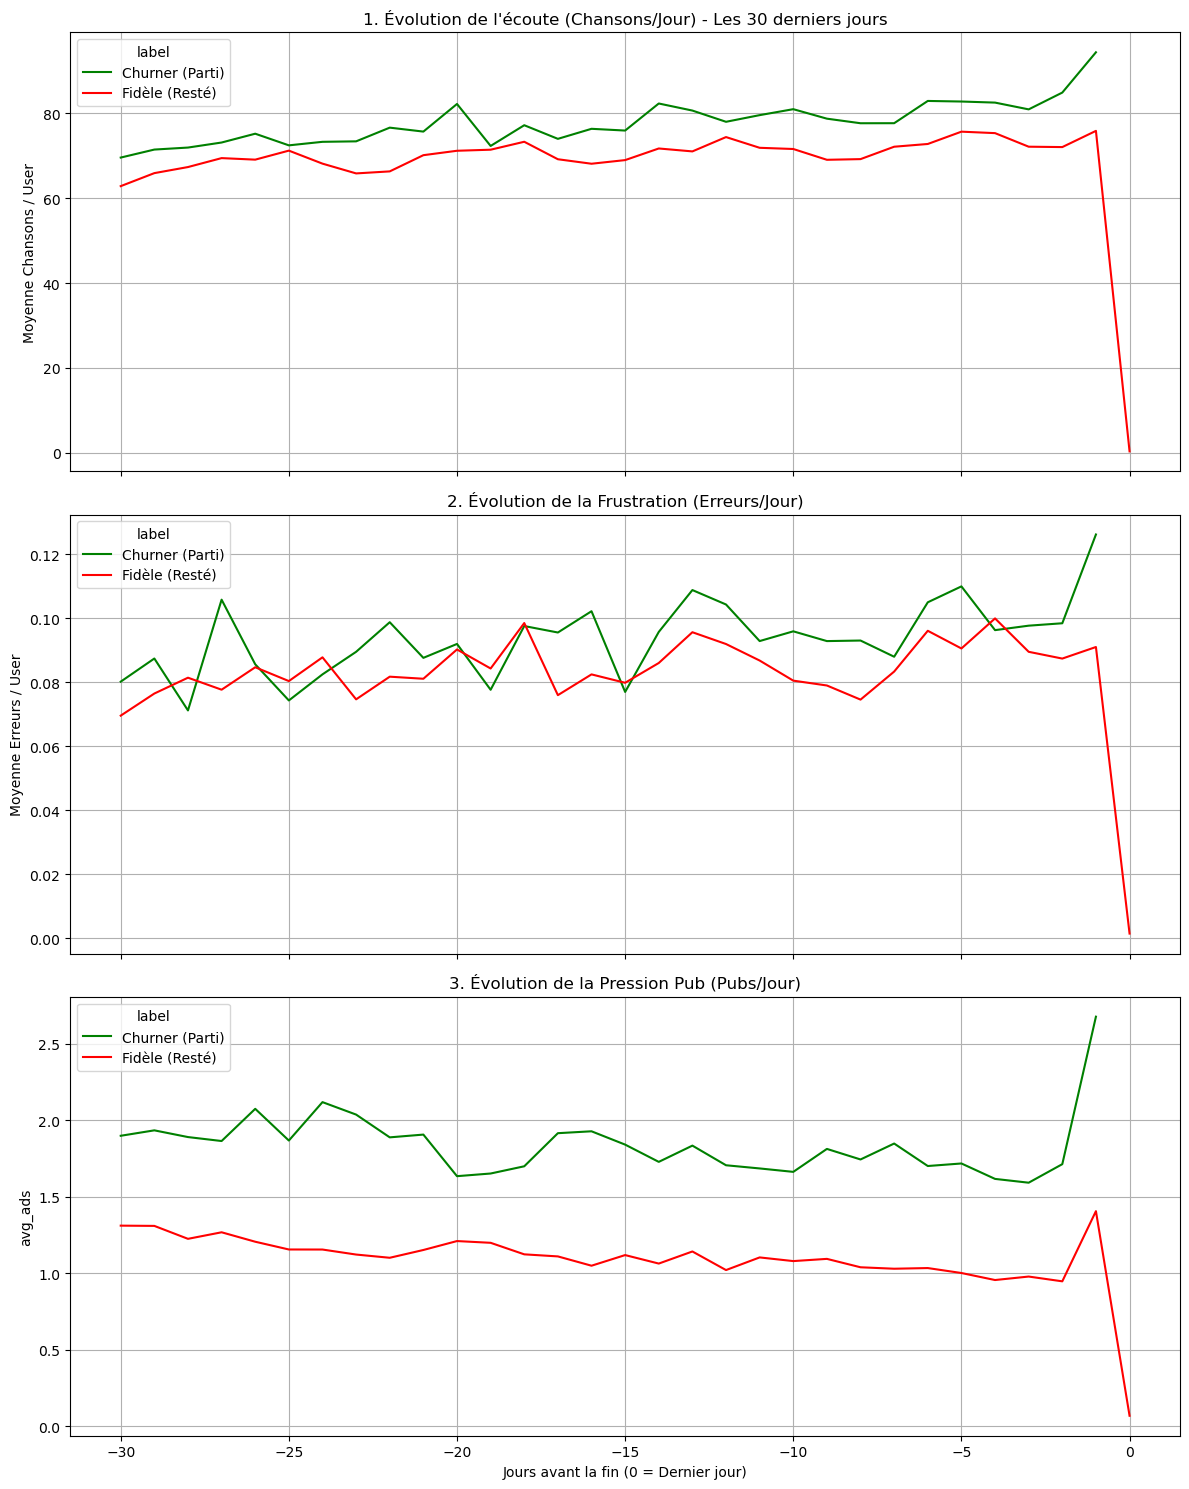

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement
df = pd.read_parquet('train.parquet')
df['date'] = pd.to_datetime(df['ts'], unit='ms')

# 2. Identification des Churners
churn_users = df[df['page'] == 'Cancellation Confirmation']['userId'].unique()
df['is_churner'] = df['userId'].isin(churn_users).astype(int)
df['label'] = df['is_churner'].map({1: 'Churner (Parti)', 0: 'Fidèle (Resté)'})

# 3. Synchronisation des horloges
# Problème : Les gens partent à des dates différentes.
# Solution : On remet tout le monde au "Jour 0" (Leur dernier jour).
# On calcule : Combien de jours avant la fin ?
last_dates = df.groupby('userId')['date'].max()
df = df.merge(last_dates.rename('last_date'), on='userId')
df['days_before_end'] = (df['date'] - df['last_date']).dt.days

# On garde les 30 derniers jours d'activité seulement pour y voir clair
df_zoom = df[df['days_before_end'] >= -30]

# 4. ANALYSE 1 : L'ACTIVITÉ (ÉCOUTE)
# Est-ce qu'ils arrêtent d'écouter progressivement ?
daily_activity = df_zoom[df_zoom['page'] == 'NextSong'].groupby(['days_before_end', 'label'])['page'].count()
# Normalisation par nombre d'utilisateurs actifs ce jour-là pour avoir une moyenne
active_users_per_day = df_zoom.groupby(['days_before_end', 'label'])['userId'].nunique()
avg_songs_per_day = daily_activity / active_users_per_day
avg_songs_per_day = avg_songs_per_day.reset_index(name='avg_songs')

# 5. ANALYSE 2 : LA FRUSTRATION (ERREURS)
daily_errors = df_zoom[df_zoom['page'] == 'Error'].groupby(['days_before_end', 'label'])['page'].count()
avg_errors_per_day = daily_errors / active_users_per_day
avg_errors_per_day = avg_errors_per_day.reset_index(name='avg_errors')

# 6. ANALYSE 3 : LA PRESSION PUB
daily_ads = df_zoom[df_zoom['page'] == 'Roll Advert'].groupby(['days_before_end', 'label'])['page'].count()
avg_ads_per_day = daily_ads / active_users_per_day
avg_ads_per_day = avg_ads_per_day.reset_index(name='avg_ads')

# --- AFFICHAGE ---
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

sns.lineplot(data=avg_songs_per_day, x='days_before_end', y='avg_songs', hue='label', ax=axes[0], palette=['green', 'red'])
axes[0].set_title('1. Évolution de l\'écoute (Chansons/Jour) - Les 30 derniers jours')
axes[0].set_ylabel('Moyenne Chansons / User')
axes[0].grid(True)

sns.lineplot(data=avg_errors_per_day, x='days_before_end', y='avg_errors', hue='label', ax=axes[1], palette=['green', 'red'])
axes[1].set_title('2. Évolution de la Frustration (Erreurs/Jour)')
axes[1].set_ylabel('Moyenne Erreurs / User')
axes[1].grid(True)

sns.lineplot(data=avg_ads_per_day, x='days_before_end', y='avg_ads', hue='label', ax=axes[2], palette=['green', 'red'])
axes[2].set_title('3. Évolution de la Pression Pub (Pubs/Jour)')
axes[2].set_xlabel('Jours avant la fin (0 = Dernier jour)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "RAGE QUIT" (Focus sur les 48 dernières heures) ---
def process_data_rage_quit(df):
    # Conversion date
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. Définir la fin de l'observation pour chaque user
    last_ts = df.groupby('userId')['date'].max().rename('last_date')
    df = df.merge(last_ts, on='userId')
    
    # B. Calculer l'écart en heures avant la fin
    df['hours_before_end'] = (df['last_date'] - df['date']).dt.total_seconds() / 3600
    
    # --- C. LE DÉCOUPAGE (La clé de l'analyse) ---
    # Zone "Rage" : Les dernières 48 heures
    rage_zone = df[df['hours_before_end'] <= 48]
    
    # Zone "Habitude" : Tout ce qui est avant 48h
    habit_zone = df[df['hours_before_end'] > 48]
    
    # --- D. CALCUL DES PICS (SPIKES) ---
    
    # 1. Le Pic de Pubs (Ad Spike)
    # Combien de pubs par heure dans la zone Rage ?
    rage_ads = rage_zone[rage_zone['page'] == 'Roll Advert'].groupby('userId')['page'].count()
    # Combien de pubs par heure dans la zone Habitude ?
    habit_ads = habit_zone[habit_zone['page'] == 'Roll Advert'].groupby('userId')['page'].count()
    
    # On normalise par la durée (sinon c'est pas comparable)
    # On simplifie : Ratio brut "Pubs récentes / Pubs passées (moyenné)"
    # Si le user est nouveau (pas d'historique), on met 0
    features = pd.DataFrame(index=df['userId'].unique())
    features['rage_ads'] = rage_ads
    features['habit_ads'] = habit_ads
    features = features.fillna(0)
    
    # LE SCORE DE CHOC PUBLICITAIRE
    # Si tu as eu 10 pubs hier et 0 avant -> Score énorme.
    features['ad_spike_score'] = features['rage_ads'] / (features['habit_ads'] + 1)
    
    # 2. Le Pic d'Erreurs (Error Spike)
    rage_errors = rage_zone[rage_zone['page'] == 'Error'].groupby('userId')['page'].count()
    habit_errors = habit_zone[habit_zone['page'] == 'Error'].groupby('userId')['page'].count()
    
    features['rage_errors'] = rage_errors
    features['habit_errors'] = habit_errors
    features = features.fillna(0)
    
    features['error_spike_score'] = features['rage_errors'] / (features['habit_errors'] + 1)
    
    # 3. L'Intensité d'Activité (High Usage Risk)
    # Tes graphs montrent que les churners sont des gros consommateurs
    total_listen = df.groupby('userId')['length'].sum()
    features['total_listen_hours'] = total_listen / (1000 * 3600)
    
    # 4. Satisfaction Globale (Le filet de sécurité)
    thumbs_up = df[df['page'] == 'Thumbs Up'].groupby('userId')['page'].count()
    thumbs_down = df[df['page'] == 'Thumbs Down'].groupby('userId')['page'].count()
    features['satisfaction'] = (thumbs_up.fillna(0) + 1) / (thumbs_down.fillna(0) + 1)
    
    # 5. Meta
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int)

    # Nettoyage
    cols = ['ad_spike_score', 'error_spike_score', 'total_listen_hours', 'satisfaction', 'is_paid']
    return features[cols].fillna(0)

print("Construction du modèle 'Rage Quit'...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_rage_quit(df_train)
test_features = process_data_rage_quit(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features.index.isin(churn_users).astype(int)

X = train_features.drop(columns=['target'])
y = train_features['target']
X_test_final = test_features

# --- 2. SCALING ROBUSTE ---
# Les "Spikes" vont avoir des valeurs extrêmes, RobustScaler est parfait
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. LOGISTIC REGRESSION CIBLÉE ---
print("Entraînement...")

# On remet des poids équilibrés
model = LogisticRegression(
    C=1.0, 
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

# --- 4. THRESHOLD TUNING (Crucial) ---
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.8, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
model.fit(X_scaled, y)
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features.index,
    'target': final_preds
})

filename = 'submission_rage_quit.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt. On croise les doigts !")

# Vérification des poids (Pour voir si 'ad_spike_score' est le roi)
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\n--- CAUSES DU CHURN (Validées par le modèle) ---")
print(coefs)

Construction du modèle 'Rage Quit'...
Entraînement...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.555
Score Local (CV) : 0.6002
Fichier 'submission_rage_quit.csv' prêt. On croise les doigts !

--- CAUSES DU CHURN (Validées par le modèle) ---
              Feature    Weight
4             is_paid  0.958663
1   error_spike_score  0.339605
2  total_listen_hours  0.059283
0      ad_spike_score  0.058405
3        satisfaction -0.491299


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "SEGMENTÉ" ---
def process_data_segmented(df):
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. Définir la fin de l'observation
    last_ts = df.groupby('userId')['date'].max().rename('last_date')
    df = df.merge(last_ts, on='userId')
    df['hours_before_end'] = (df['last_date'] - df['date']).dt.total_seconds() / 3600
    
    # B. Zones Rage vs Habitude
    rage_zone = df[df['hours_before_end'] <= 48]
    habit_zone = df[df['hours_before_end'] > 48]
    
    # C. Les Spikes (Pics)
    features = pd.DataFrame(index=df['userId'].unique())
    
    # Pubs
    rage_ads = rage_zone[rage_zone['page'] == 'Roll Advert'].groupby('userId')['page'].count()
    habit_ads = habit_zone[habit_zone['page'] == 'Roll Advert'].groupby('userId')['page'].count()
    features['ad_spike'] = rage_ads.fillna(0) / (habit_ads.fillna(0) + 1)
    
    # Erreurs
    rage_err = rage_zone[rage_zone['page'] == 'Error'].groupby('userId')['page'].count()
    habit_err = habit_zone[habit_zone['page'] == 'Error'].groupby('userId')['page'].count()
    features['error_spike'] = rage_err.fillna(0) / (habit_err.fillna(0) + 1)
    
    # D. Satisfaction & Engagement
    thumbs_up = df[df['page'] == 'Thumbs Up'].groupby('userId')['page'].count()
    thumbs_down = df[df['page'] == 'Thumbs Down'].groupby('userId')['page'].count()
    features['satisfaction'] = (thumbs_up.fillna(0) + 1) / (thumbs_down.fillna(0) + 1)
    
    total_listen = df.groupby('userId')['length'].sum()
    features['total_listen_hours'] = total_listen / (1000 * 3600)
    
    # E. META & INTERACTIONS (LA CLÉ)
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int)
    features['is_free'] = 1 - features['is_paid'] # Inverse
    
    # F. CRÉATION DE VARIABLES CROISÉES (INTERACTIONS)
    # Le modèle va comprendre : "Impact de la Pub UNIQUEMENT pour les Gratuits"
    features['ads_impact_free'] = features['ad_spike'] * features['is_free']
    
    # "Impact de la Satisfaction UNIQUEMENT pour les Payants"
    features['satisfaction_impact_paid'] = features['satisfaction'] * features['is_paid']
    
    # "Impact des Erreurs pour tout le monde"
    features['error_impact_all'] = features['error_spike']
    
    # Nettoyage
    cols = ['ads_impact_free', 'satisfaction_impact_paid', 'error_impact_all', 'total_listen_hours', 'is_paid']
    return features[cols].fillna(0)

print("Préparation Segmentée...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_segmented(df_train)
test_features = process_data_segmented(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features.index.isin(churn_users).astype(int)

X = train_features.drop(columns=['target'])
y = train_features['target']
X_test_final = test_features

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# Entraînement
print("Entraînement avec interactions...")
model = LogisticRegression(C=1.0, class_weight='balanced', max_iter=2000, random_state=42)

# Threshold Tuning
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]
best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.8, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# Analyse des poids
model.fit(X_scaled, y)
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\n--- NOUVEAUX FACTEURS ---")
print(coefs)

# Soumission
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)
submission = pd.DataFrame({'id': test_features.index, 'target': final_preds})
submission.to_csv('submission_segmented.csv', index=False)
print("Fichier prêt.")

Préparation Segmentée...
Entraînement avec interactions...

--- RÉSULTATS ---
Meilleur seuil : 0.560
Score Local (CV) : 0.5768

--- NOUVEAUX FACTEURS ---
                    Feature    Weight
4                   is_paid  1.308215
2          error_impact_all  0.751965
0           ads_impact_free  0.015083
3        total_listen_hours -0.013707
1  satisfaction_impact_paid -0.776752
Fichier prêt.


In [6]:
# On regarde qui sont les gens qui ont 'target = 1'
churners_data = df_train[df_train['page'] == 'Cancellation Confirmation']

print("--- QUI SONT LES CHURNERS ? ---")
print(churners_data['level'].value_counts())

print("\n--- POURCENTAGE ---")
total_churners = len(churners_data)
paid_churners = len(churners_data[churners_data['level'] == 'paid'])
print(f"Part des utilisateurs PAYANTS parmi les churners : {paid_churners / total_churners * 100:.2f}%")

--- QUI SONT LES CHURNERS ? ---
level
paid    2879
free    1392
Name: count, dtype: int64

--- POURCENTAGE ---
Part des utilisateurs PAYANTS parmi les churners : 67.41%


In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import RobustScaler

# --- 1. FEATURE ENGINEERING "HYBRIDE" ---
def process_data_final(df):
    # Conversion date
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. STRUCTURE DE BASE
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. GESTION DU TEMPS (Récence & Tendance)
    # 1. Le Silence (Combien d'heures depuis la dernière action ?)
    last_ts = df.groupby('userId')['date'].max()
    global_max = df['date'].max() # Date de fin de l'observation globale
    # On ajoute la donnée au dataframe principal
    df = df.merge(last_ts.rename('user_last_date'), on='userId')
    
    # Calcul en heures
    features['hours_since_last_action'] = (global_max - last_ts.values).dt.total_seconds() / 3600
    
    # 2. La Tendance (Trend) : Activité récente vs Moyenne
    # On compare les 14 derniers jours vs la vie entière
    df['days_from_end'] = (df['user_last_date'] - df['date']).dt.days
    
    recent_acts = df[df['days_from_end'] <= 14].groupby('userId')['page'].count()
    total_acts = df.groupby('userId')['page'].count()
    lifetime = (df.groupby('userId')['date'].max() - df.groupby('userId')['date'].min()).dt.days + 1
    
    daily_avg_recent = recent_acts.fillna(0) / 14
    daily_avg_total = total_acts / lifetime
    
    features['trend_score'] = daily_avg_recent / daily_avg_total.replace(0, 1)

    # C. LOGIQUE SEGMENTÉE (PAYANT VS GRATUIT)
    
    # 1. Identification
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # 2. Pression Pub (Seulement pertinent pour les gratuits, mais on le calcule pour tous)
    total_listen = df.groupby('userId')['length'].sum().fillna(1)
    # Pubs par heure d'écoute
    features['ad_intensity'] = features.get('Roll Advert', 0) / (total_listen.values / (1000*3600))
    
    # 3. Rentabilité (Seulement pertinent pour les payants)
    # Heures d'écoute totales
    features['listen_hours'] = total_listen.values / (1000*3600)
    
    # 4. Rage Quit (Erreurs récentes)
    # On regarde si les erreurs sont concentrées sur la fin
    recent_errors = df[(df['days_from_end'] <= 2) & (df['page'] == 'Error')].groupby('userId')['page'].count()
    features['recent_error_spike'] = recent_errors.fillna(0)

    # 5. Satisfaction
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 6. Volatilité (Downgrade/Upgrade)
    features['volatility'] = features.get('Downgrade', 0) + features.get('Submit Upgrade', 0)

    # Nettoyage et Sélection
    cols = ['userId', 'hours_since_last_action', 'trend_score', 'is_paid', 
            'ad_intensity', 'listen_hours', 'recent_error_spike', 
            'thumbs_ratio', 'volatility']
    
    return features[cols].fillna(0)

print("Préparation des données Hybrides...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_final(df_train)
test_features = process_data_final(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 2. MODÈLE XGBOOST (Capable de gérer les "Si... Alors...") ---
print("Entraînement XGBoost...")

# Calcul du ratio pour l'équilibre des classes
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

# Configuration "Arbre Profond" pour capter les différences Payant/Gratuit
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.02,    # Apprentissage lent et précis
    max_depth=6,           # Profondeur suffisante pour faire "Is Paid? -> Yes -> Listen Time"
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio, # Indispensable pour l'imbalance
    random_state=42,
    n_jobs=1               # Sécurité anti-crash
)

# --- 3. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# On utilise cross_val_predict pour avoir des prédictions propres sur tout le train
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.8, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 4. ANALYSE (Pour vérifier la logique) ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- CE QUI COMPTE VRAIMENT ---")
print(importances)

# --- 5. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds})
submission.to_csv('submission_hybrid_xgb.csv', index=False)
print(f"Fichier prêt. Churners prédits : {sum(final_preds)}")

Préparation des données Hybrides...


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('O') and dtype('<M8[ns]')

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import RobustScaler

# --- 1. FEATURE ENGINEERING "HYBRIDE" (CORRIGÉ) ---
def process_data_final(df):
    # Conversion date
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. STRUCTURE DE BASE
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. GESTION DU TEMPS (CORRECTION DU BUG)
    # 1. Le Silence (Combien d'heures depuis la dernière action ?)
    last_ts = df.groupby('userId')['date'].max().rename('user_last_date')
    
    # ON FUSIONNE D'ABORD (C'est la correction : on aligne tout proprement)
    features = features.merge(last_ts, on='userId', how='left')
    
    # Maintenant on peut faire le calcul sans erreur de type
    global_max = df['date'].max() 
    features['hours_since_last_action'] = (global_max - features['user_last_date']).dt.total_seconds() / 3600
    
    # 2. La Tendance (Trend) : Activité récente vs Moyenne
    # On ajoute la date de chaque action dans le df principal pour comparer
    # Attention : df a plusieurs lignes par user, features n'en a qu'une.
    # On doit refaire le merge inverse pour calculer days_from_end sur le df principal
    df = df.merge(features[['userId', 'user_last_date']], on='userId', suffixes=('', '_y'))
    
    df['days_from_end'] = (df['user_last_date'] - df['date']).dt.days
    
    # Calcul des ratios
    recent_acts = df[df['days_from_end'] <= 14].groupby('userId')['page'].count().rename('recent_count')
    total_acts = df.groupby('userId')['page'].count().rename('total_count')
    
    # Durée de vie (Lifetime) en jours
    user_lifetime = (df.groupby('userId')['date'].max() - df.groupby('userId')['date'].min()).dt.days + 1
    user_lifetime = user_lifetime.rename('lifetime_days')
    
    # On fusionne tout dans features pour être sûr de l'ordre
    features = features.merge(recent_acts, on='userId', how='left').fillna(0)
    features = features.merge(total_acts, on='userId', how='left')
    features = features.merge(user_lifetime, on='userId', how='left')
    
    # Calcul mathématique
    daily_avg_recent = features['recent_count'] / 14
    daily_avg_total = features['total_count'] / features['lifetime_days']
    
    features['trend_score'] = daily_avg_recent / daily_avg_total.replace(0, 1)

    # C. LOGIQUE SEGMENTÉE (PAYANT VS GRATUIT)
    
    # 1. Identification
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features = features.merge(meta, on='userId', how='left')
    features['is_paid'] = (features['level'] == 'paid').astype(int)
    
    # 2. Pression Pub
    total_listen = df.groupby('userId')['length'].sum().fillna(1).rename('total_listen_ms')
    features = features.merge(total_listen, on='userId', how='left')
    
    # Pubs par heure d'écoute
    features['ad_intensity'] = features.get('Roll Advert', 0) / (features['total_listen_ms'] / (1000*3600))
    
    # 3. Rentabilité (Heures d'écoute totales)
    features['listen_hours'] = features['total_listen_ms'] / (1000*3600)
    
    # 4. Rage Quit (Erreurs récentes)
    recent_errors = df[(df['days_from_end'] <= 2) & (df['page'] == 'Error')].groupby('userId')['page'].count().rename('recent_error_spike')
    features = features.merge(recent_errors, on='userId', how='left').fillna(0)

    # 5. Satisfaction
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 6. Volatilité
    features['volatility'] = features.get('Downgrade', 0) + features.get('Submit Upgrade', 0)

    # Nettoyage Final
    cols = ['userId', 'hours_since_last_action', 'trend_score', 'is_paid', 
            'ad_intensity', 'listen_hours', 'recent_error_spike', 
            'thumbs_ratio', 'volatility']
    
    # On remplit les trous éventuels et on retourne
    return features[cols].fillna(0)

print("Préparation des données Hybrides (Corrigée)...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_final(df_train)
test_features = process_data_final(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 2. MODÈLE XGBOOST ---
print("Entraînement XGBoost...")

# Calcul du ratio pour l'équilibre des classes
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

# Configuration Hybride
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=1 
)

# --- 3. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.8, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 4. ANALYSE ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- CE QUI COMPTE VRAIMENT ---")
print(importances)

# --- 5. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds})
submission.to_csv('submission_hybrid_xgb.csv', index=False)
print(f"Fichier prêt. Churners prédits : {sum(final_preds)}")

Préparation des données Hybrides (Corrigée)...
Entraînement XGBoost...

--- RÉSULTATS ---
Meilleur seuil : 0.430
Score Local (CV) : 0.8687

--- CE QUI COMPTE VRAIMENT ---
                   Feature  Importance
0  hours_since_last_action    0.428362
7               volatility    0.128886
4             listen_hours    0.108832
2                  is_paid    0.107007
3             ad_intensity    0.076454
6             thumbs_ratio    0.059677
1              trend_score    0.058675
5       recent_error_spike    0.032107
Fichier prêt. Churners prédits : 308


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import RobustScaler

# --- 1. FEATURE ENGINEERING "LEAK-PROOF" (Anti-Fuite) ---
def process_data_safe(df):
    # A. Base Crosstab
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # B. DUREE DE VIE REELLE (Pas par rapport à la fin du fichier)
    # On calcule la distance entre SA première action et SA dernière action
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    user_times = df.groupby('userId')['date'].agg(['min', 'max'])
    features['lifetime_hours'] = (user_times['max'] - user_times['min']).dt.total_seconds() / 3600
    features['lifetime_hours'] = features['lifetime_hours'].replace(0, 1) # Sécurité
    
    # C. INTENSITÉ (Densité d'action)
    # Au lieu de regarder le silence, on regarde s'il est actif QUAND il est là
    features['total_actions'] = features.drop(columns=['userId', 'lifetime_hours'], errors='ignore').sum(axis=1)
    features['actions_per_hour'] = features['total_actions'] / features['lifetime_hours']
    
    # D. RATIOS DE COMPORTEMENT (Safe)
    
    # 1. Pression Pub (Nb Pubs / Heures de vie)
    features['ad_density'] = features.get('Roll Advert', 0) / features['lifetime_hours']
    
    # 2. Frustration (Nb Erreurs / Total Actions)
    features['error_rate'] = features.get('Error', 0) / features['total_actions'].replace(0, 1)
    
    # 3. Satisfaction (Ratio Pouces)
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 4. Engagement Social (Amis + Playlist)
    features['social_score'] = features.get('Add Friend', 0) + features.get('Add to Playlist', 0)
    
    # 5. Volatilité (Downgrade/Upgrade)
    features['volatility'] = features.get('Downgrade', 0) + features.get('Submit Upgrade', 0)

    # E. META (Identification Payant/Gratuit)
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features = features.merge(meta, on='userId', how='left')
    features['is_paid'] = (features['level'] == 'paid').astype(int)
    
    # F. INTERACTION PAYANT
    # Un payant qui a une faible intensité est suspect
    features['paid_intensity'] = features['is_paid'] * features['actions_per_hour']

    # Nettoyage : On ne garde que ce qui est indépendant de la "date de fin"
    cols = ['userId', 'actions_per_hour', 'ad_density', 'error_rate', 
            'thumbs_ratio', 'social_score', 'volatility', 'is_paid', 'paid_intensity']
    
    return features[cols].fillna(0)

print("Préparation des données Safe...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_safe(df_train)
test_features = process_data_safe(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 2. MODÈLE RANDOM FOREST (Plus stable que XGBoost sur peu de features) ---
print("Entraînement Random Forest (Mode Robustesse)...")

# class_weight='balanced_subsample' est souvent meilleur pour RF
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,          # Pas trop profond pour généraliser
    min_samples_leaf=10,  # On veut des groupes d'utilisateurs significatifs
    class_weight='balanced_subsample', 
    random_state=42,
    n_jobs=1              # Sécurité Mac
)

# --- 3. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# On utilise cross_val_predict pour ne pas fuiter
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.01)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS (Plus réalistes) ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 4. ANALYSE RAPIDE ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- FACTEURS ROBUSTES ---")
print(importances)

# --- 5. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds})
submission.to_csv('submission_safe_rf.csv', index=False)
print(f"Fichier prêt. Churners prédits : {sum(final_preds)}")

Préparation des données Safe...
Entraînement Random Forest (Mode Robustesse)...

--- RÉSULTATS (Plus réalistes) ---
Meilleur seuil : 0.480
Score Local (CV) : 0.6177

--- FACTEURS ROBUSTES ---
            Feature  Importance
3      thumbs_ratio    0.461042
5        volatility    0.202506
4      social_score    0.144549
6           is_paid    0.097869
2        error_rate    0.094034
0  actions_per_hour    0.000000
1        ad_density    0.000000
7    paid_intensity    0.000000
Fichier prêt. Churners prédits : 1563


In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "HEARTBEAT" (Rythme Cardiaque) ---
def process_data_heartbeat(df):
    # Conversion date
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # A. Calcul des "GAPS" (Ecarts de temps entre actions)
    # C'est la méthode la plus fiable pour mesurer l'activité sans tricher
    # On trie par user et par date
    df = df.sort_values(['userId', 'date'])
    
    # On calcule la différence de temps avec l'action précédente pour chaque user
    # shift(1) décale d'une ligne.
    df['prev_date'] = df.groupby('userId')['date'].shift(1)
    df['gap_hours'] = (df['date'] - df['prev_date']).dt.total_seconds() / 3600
    
    # B. Aggrégation par Utilisateur
    user_stats = df.groupby('userId').agg({
        'gap_hours': ['mean', 'max', 'std'], # Moyenne des pauses, Pause max, Régularité
        'page': 'count'
    })
    
    # Aplatir les colonnes (gap_hours_mean, gap_hours_max...)
    user_stats.columns = ['_'.join(col).strip() for col in user_stats.columns.values]
    user_stats = user_stats.reset_index()
    
    # C. CROSSTAB CLASSIQUE (Pour les ratios)
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    # Fusion avec les stats de temps
    features = features.merge(user_stats, on='userId', how='left')
    features = features.fillna(0) # Le premier gap est NaN, on met 0
    
    # D. RATIOS PUISSANTS (Réparés)
    
    # 1. Densité Pub (Pubs / Total Actions)
    # Plus simple et plus robuste que par heure
    features['total_actions'] = features['page_count'] # On utilise le compte calculé plus haut
    features['ad_ratio'] = features.get('Roll Advert', 0) / features['total_actions']
    
    # 2. Satisfaction (Le Roi du modèle précédent)
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 3. Frustration
    features['error_ratio'] = features.get('Error', 0) / features['total_actions']
    
    # 4. Volatilité
    features['volatility'] = features.get('Downgrade', 0) + features.get('Submit Upgrade', 0)

    # 5. La "Régularité" (Nouveau)
    # Si gap_hours_std est élevé, l'utilisateur est irrégulier (vient, part, revient...)
    features['irregularity'] = features['gap_hours_std'].fillna(0)

    # E. META
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features = features.merge(meta, on='userId', how='left')
    features['is_paid'] = (features['level'] == 'paid').astype(int)
    
    # F. SEGMENTATION
    # Impact Pub (Uniquement pour les non-payants)
    features['ad_impact'] = features['ad_ratio'] * (1 - features['is_paid'])
    
    # Nettoyage
    cols = ['userId', 'gap_hours_mean', 'gap_hours_max', 'irregularity', 
            'ad_impact', 'thumbs_ratio', 'error_ratio', 'volatility', 'is_paid']
    
    return features[cols].fillna(0)

print("Calcul du Rythme Cardiaque (Gaps)...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_heartbeat(df_train)
test_features = process_data_heartbeat(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 2. MODÈLE XGBOOST (Robustesse & Performance) ---
print("Entraînement XGBoost...")

# Ratio pour l'équilibre
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(
    n_estimators=600,
    learning_rate=0.015,   # Très lent pour bien apprendre les subtilités
    max_depth=7,           # Assez profond pour les interactions complexes
    subsample=0.7,         # Evite l'overfitting
    colsample_bytree=0.7,  # Evite l'overfitting
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=1               # Sécurité
)

# --- 3. OPTIMISATION DU SEUIL ---
# On utilise cross_val_predict pour simuler le test set
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 4. ANALYSE ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- FACTEURS CLÉS ---")
print(importances)

# --- 5. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds})
submission.to_csv('submission_heartbeat_xgb.csv', index=False)
print(f"Fichier prêt. Churners prédits : {sum(final_preds)}")

Calcul du Rythme Cardiaque (Gaps)...
Entraînement XGBoost...

--- RÉSULTATS ---
Meilleur seuil : 0.480
Score Local (CV) : 0.7748

--- FACTEURS CLÉS ---
          Feature  Importance
1   gap_hours_max    0.228917
2    irregularity    0.136773
7         is_paid    0.129422
6      volatility    0.115224
4    thumbs_ratio    0.106538
0  gap_hours_mean    0.101695
3       ad_impact    0.096389
5     error_ratio    0.085043
Fichier prêt. Churners prédits : 589


In [11]:
# Uniquement si tu veux tenter le "Super Score" après avoir testé le XGBoost seul
print("Génération du BLEND (Mélange)...")

# 1. On ré-entraîne une LogReg simple sur les données Heartbeat (Safe)
# On scale car LogReg en a besoin
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

model_lr = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000)
model_lr.fit(X_scaled, y)

# 2. On récupère les probabilités des DEUX modèles
probs_xgb = model.predict_proba(X_test_final)[:, 1] # Ton XGBoost actuel
probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1] # La LogReg

# 3. On fait la moyenne (Blend)
# On donne plus de poids au XGBoost car il est meilleur (0.7 vs 0.3)
final_probs = (0.7 * probs_xgb) + (0.3 * probs_lr)

# 4. On applique le seuil optimal (0.480 trouvé tout à l'heure)
final_preds_blend = (final_probs >= 0.48).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds_blend})
submission.to_csv('submissionBLEND.csv', index=False)
print(f"Fichier Mélangé prêt. Churners : {sum(final_preds_blend)}")

Génération du BLEND (Mélange)...
Fichier Mélangé prêt. Churners : 662


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "BURNOUT" ---
def process_data_burnout(df):
    # A. Base & Temps
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    
    # Calcul de la durée de vie ACTIVE (Distance entre 1ère et dernière action)
    user_span = df.groupby('userId')['date'].agg(['min', 'max'])
    lifetime_days = (user_span['max'] - user_span['min']).dt.total_seconds() / (3600 * 24)
    lifetime_days = lifetime_days.replace(0, 1).rename('lifetime_days') # Min 1 jour
    
    # B. COMPTAGE
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features = features.reset_index()
    
    features = features.merge(lifetime_days, on='userId', how='left')
    
    # C. INDICATEURS DE BURNOUT (Basés sur tes graphiques)
    
    # 1. Intensité d'usage (Les Churners sont des gros consommateurs)
    # Total actions / Durée de vie
    features['total_actions'] = features.drop(columns=['userId', 'lifetime_days'], errors='ignore').sum(axis=1)
    features['daily_activity'] = features['total_actions'] / features['lifetime_days']
    
    # 2. Densité Publicitaire (Le Punisseur)
    # Combien de pubs par Chanson écoutée ? (C'est le ratio de la souffrance)
    features['ads_per_song'] = features.get('Roll Advert', 0) / features.get('NextSong', 1).replace(0, 1)
    
    # 3. Frustration Technique (Erreurs / Jour)
    features['errors_per_day'] = features.get('Error', 0) / features['lifetime_days']
    
    # 4. Satisfaction Nette
    features['thumbs_ratio'] = (features.get('Thumbs Up', 0) + 1) / (features.get('Thumbs Down', 0) + 1)
    
    # 5. Volatilité (Recherche de sortie)
    features['volatility'] = features.get('Downgrade', 0) + features.get('Submit Upgrade', 0) + features.get('Settings', 0)
    
    # D. META
    meta = df.sort_values('ts').groupby('userId')[['level']].last()
    features = features.merge(meta, on='userId', how='left')
    features['is_paid'] = (features['level'] == 'paid').astype(int)
    
    # E. INTERACTION (Le "Burnout Score")
    # Si tu es Gratuit ET que tu as une grosse activité -> Risque Maximum de pubs
    features['burnout_risk'] = features['daily_activity'] * (1 - features['is_paid']) * features['ads_per_song']

    # Sélection stricte (Anti-Bruit)
    cols = ['userId', 'daily_activity', 'ads_per_song', 'errors_per_day', 
            'thumbs_ratio', 'volatility', 'is_paid', 'burnout_risk']
    
    return features[cols].fillna(0)

print("Calcul des indicateurs de Burnout...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_burnout(df_train)
test_features = process_data_burnout(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 2. SCALING (Vital pour LogReg) ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 3. LE DUO GAGNANT (Voting Classifier) ---
print("Entraînement du Duo (RF + LogReg)...")

# Modèle 1 : Random Forest (Le champion actuel - 0.585)
# Il est bon pour trouver les seuils complexes
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10, 
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=1
)

# Modèle 2 : Logistic Regression (Le challenger - 0.60 historique)
# Il est bon pour les tendances linéaires (Plus de pub = Plus de départ)
lr = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000)

# Le Vote
# On donne un poids égal aux deux. Ils se corrigent mutuellement.
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    voting='soft', 
    weights=[1, 1],
    n_jobs=1
)

# --- 4. THRESHOLD TUNING (Ne jamais oublier ça) ---
# On entraine sur tout via CrossVal pour trouver le seuil
# Attention : il faut scaler pour LogReg mais RF s'en fiche (pas grave de lui donner du scalé)
y_preds_proba = cross_val_predict(voting_clf, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_preds_proba >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. SOUMISSION ---
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({'id': test_features['userId'], 'target': final_preds})
submission.to_csv('submission_burnout_voting.csv', index=False)
print(f"Fichier prêt. Churners prédits : {sum(final_preds)}")

Calcul des indicateurs de Burnout...
Entraînement du Duo (RF + LogReg)...

--- RÉSULTATS ---
Meilleur seuil : 0.510
Score Local (CV) : 0.7568
Fichier prêt. Churners prédits : 680


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

# --- 1. TA FONCTION GAGNANTE (INCHANGÉE) ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. LE PIPELINE BOOSTÉ ---
# C'est ici que la magie opère. On emballe tout dans un "Tuyau" (Pipeline).

print("Entraînement de la Super LogReg (Poly + Robust)...")

pipeline = Pipeline([
    # Etape 1 : Nettoyage Robuste (Mieux que Standard)
    ('scaler', RobustScaler()), 
    
    # Etape 2 : Création d'interactions (A * B)
    # degree=2 : Crée des carrés et des produits croisés
    # interaction_only=True : Évite de créer A^2 (trop lourd), garde juste A*B
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    
    # Etape 3 : Le Modèle (Ton champion)
    # On baisse un peu C (0.05) car avec plus de variables (poly), il faut régulariser plus
    ('model', LogisticRegression(C=0.05, class_weight='balanced', max_iter=2000, random_state=42))
])

# --- 4. VALIDATION CROISÉE ---
# On vérifie si ça améliore ton score local
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='balanced_accuracy')

print(f"\n--- RÉSULTATS ---")
print(f"Score Local Moyen : {scores.mean():.4f}")
print(f"(Si > 0.60, c'est très bon signe pour Kaggle)")

# --- 5. SOUMISSION ---
pipeline.fit(X, y) # Entraînement final sur tout
predictions = pipeline.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': predictions
})

filename = 'submission_v30.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' généré !")
print(f"Nombre de churners prédits : {sum(predictions)}")

Chargement des données...
Entraînement de la Super LogReg (Poly + Robust)...

--- RÉSULTATS ---
Score Local Moyen : 0.6651
(Si > 0.60, c'est très bon signe pour Kaggle)
Fichier 'submission_v30.csv' généré !
Nombre de churners prédits : 1164


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. TA FONCTION GAGNANTE (INCHANGÉE - "GOLD STANDARD") ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING STANDARD (Celui du record à 0.64) ---
print("Scaling Standard...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE MODÈLE "BAGGING" (L'Amélioration Sûre) ---
print("Entraînement du Bagging de LogReg...")

# Le soldat de base (Ta LogReg qui marche)
base_lr = LogisticRegression(
    C=0.1, 
    class_weight='balanced', 
    solver='liblinear', # Plus stable pour les datasets moyens
    max_iter=2000
)

# L'armée (15 soldats)
model = BaggingClassifier(
    estimator=base_lr,
    n_estimators=15,    # 15 modèles qui votent
    max_samples=0.8,    # Chaque modèle voit 80% des données (diversité)
    bootstrap=True,
    random_state=42,
    n_jobs=1            # Sécurité Mac
)

# --- 5. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# On utilise cross_val_predict pour avoir des probas propres (sans fuite)
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005) # On affine la recherche autour de 0.5

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
model.fit(X_scaled, y)
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_bagging_logreg.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données...
Scaling Standard...
Entraînement du Bagging de LogReg...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.510
Score Local (CV) : 0.6558
Fichier 'submission_bagging_logreg.csv' prêt !
Nombre de churners prédits : 1090


In [15]:
df_train.head(30)


,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
0,200,M,Shlok,paid,Johnson,1749042,1538352001000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",278,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,524.32934,Ich mache einen Spiegel - Dream Part 4,Popol Vuh,2018-10-01 00:00:01,2018-08-08 13:22:21
992,200,M,Shlok,paid,Johnson,1749042,1538352525000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",279,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,178.02404,Monster (Album Version),Skillet,2018-10-01 00:08:45,2018-08-08 13:22:21
1360,200,M,Shlok,paid,Johnson,1749042,1538352703000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",280,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,232.61995,Seven Nation Army,The White Stripes,2018-10-01 00:11:43,2018-08-08 13:22:21
1825,200,M,Shlok,paid,Johnson,1749042,1538352935000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",281,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,265.50812,Under The Bridge (Album Version),Red Hot Chili Peppers,2018-10-01 00:15:35,2018-08-08 13:22:21
2366,200,M,Shlok,paid,Johnson,1749042,1538353200000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",282,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,471.69261,Circlesong 6,Bobby McFerrin,2018-10-01 00:20:00,2018-08-08 13:22:21
3271,200,M,Shlok,paid,Johnson,1749042,1538353671000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",283,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,266.86649,Who Can Compare,Foolish Things,2018-10-01 00:27:51,2018-08-08 13:22:21
3802,200,M,Shlok,paid,Johnson,1749042,1538353937000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,1400.65914,Angel Dust,Gil Scott Heron,2018-10-01 00:32:17,2018-08-08 13:22:21
6585,200,M,Shlok,paid,Johnson,1749042,1538355337000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",285,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,186.98404,Sweet And Dandy,Toots & The Maytals,2018-10-01 00:55:37,2018-08-08 13:22:21
6675,200,M,Shlok,paid,Johnson,1749042,1538355388000,Logged In,Downgrade,22683,"Dallas-Fort Worth-Arlington, TX",286,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-01 00:56:28,2018-08-08 13:22:21
6961,200,M,Shlok,paid,Johnson,1749042,1538355523000,Logged In,NextSong,22683,"Dallas-Fort Worth-Arlington, TX",287,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,306.05016,On The Moon,Peter Cincotti,2018-10-01 00:58:43,2018-08-08 13:22:21


In [17]:
df_train['page'].unique(), df_train['level'].unique(), df_train['gender'].unique()


(array(['NextSong', 'Downgrade', 'Help', 'Home', 'Thumbs Up', 'Add Friend',
        'Thumbs Down', 'Add to Playlist', 'Logout', 'About', 'Settings',
        'Save Settings', 'Cancel', 'Cancellation Confirmation',
        'Submit Downgrade', 'Roll Advert', 'Upgrade', 'Error',
        'Submit Upgrade'], dtype=object),
 array(['paid', 'free'], dtype=object),
 array(['M', 'F'], dtype=object))

In [18]:
df_train[['userId','ts']].head(50)


,userId,ts
0,1749042,1538352001000
992,1749042,1538352525000
1360,1749042,1538352703000
1825,1749042,1538352935000
2366,1749042,1538353200000
3271,1749042,1538353671000
3802,1749042,1538353937000
6585,1749042,1538355337000
6675,1749042,1538355388000
6961,1749042,1538355523000


In [19]:
df_train[df_train['page'].str.contains('Cancellation', na=False)].head(20)


,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
6662491,200,M,Shlok,paid,Johnson,1749042,1540084584000,Cancelled,Cancellation Confirmation,100362,"Dallas-Fort Worth-Arlington, TX",62,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-21 01:16:24,2018-08-08 13:22:21
9995603,200,M,Andres,paid,Foley,1222580,1540941450000,Cancelled,Cancellation Confirmation,132552,"Watertown, SD",180,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",GET,NaN,None,None,2018-10-30 23:17:30,2018-08-16 02:31:00
15770906,200,M,Azari,paid,Hansen,1385500,1542430449000,Cancelled,Cancellation Confirmation,192519,"Martinsville, VA",189,"""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...",GET,NaN,None,None,2018-11-17 04:54:09,2018-08-16 04:30:35
181774,200,F,Riley,paid,Hernandez,1032628,1538411237000,Cancelled,Cancellation Confirmation,14853,"Reading, PA",591,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",GET,NaN,None,None,2018-10-01 16:27:17,2018-09-22 12:15:45
862670,200,F,Valarie,paid,Moore,1009070,1538587299000,Cancelled,Cancellation Confirmation,29667,"Los Angeles-Long Beach-Anaheim, CA",26,"""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537....",GET,NaN,None,None,2018-10-03 17:21:39,2018-09-24 11:58:56
9062795,200,M,Weston,paid,Allen,1144647,1540694638000,Cancelled,Cancellation Confirmation,128179,"Athens, TX",26,"""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-28 02:43:58,2018-09-08 05:11:14
1834641,200,M,David,paid,Ortiz,1834381,1538835071000,Cancelled,Cancellation Confirmation,26337,"Atlanta-Sandy Springs-Roswell, GA",45,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8...",GET,NaN,None,None,2018-10-06 14:11:11,2018-09-15 04:00:36
14939492,200,M,Salvatore,paid,Huffman,1240184,1542231816000,Cancelled,Cancellation Confirmation,191065,"Washington-Arlington-Alexandria, DC-VA-MD-WV",100,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:31....,GET,NaN,None,None,2018-11-14 21:43:36,2018-09-19 18:34:21
8275977,200,M,Noah,paid,Brown,1063929,1540489285000,Cancelled,Cancellation Confirmation,110140,"Utica-Rome, NY",177,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",GET,NaN,None,None,2018-10-25 17:41:25,2018-09-21 14:55:56
6515702,200,F,Maliya,paid,Hubbard,1559837,1540031004000,Cancelled,Cancellation Confirmation,100729,"Columbus, OH",391,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET,NaN,None,None,2018-10-20 10:23:24,2018-09-28 06:39:09


In [20]:
train_features['target'].value_counts()


target
0    14869
1     4271
Name: count, dtype: int64

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import PowerTransformer # C'est lui la star
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. TA FONCTION GAGNANTE (ON NE TOUCHE À RIEN) ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING GAUSSIEN (L'UPGRADE) ---
print("Transformation PowerTransformer (Yeo-Johnson)...")
# Cela va 'normaliser' les distributions tordues pour aider la LogReg
scaler = PowerTransformer(method='yeo-johnson') 
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. BAGGING LOGREG RENFORCÉ ---
print("Entraînement du Bagging (20 modèles)...")

# On garde les mêmes paramètres gagnants
base_lr = LogisticRegression(
    C=0.1, 
    class_weight='balanced', 
    solver='liblinear',
    max_iter=3000 # On augmente un peu pour être sûr de la convergence
)

# On monte à 20 estimateurs pour lisser encore plus les erreurs
model = BaggingClassifier(
    estimator=base_lr,
    n_estimators=20,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
# Recherche fine autour de 0.5
thresholds = np.arange(0.40, 0.60, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
model.fit(X_scaled, y)
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v32.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données...
Transformation PowerTransformer (Yeo-Johnson)...
Entraînement du Bagging (20 modèles)...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.480
Score Local (CV) : 0.6610
Fichier 'submission_v32.csv' prêt !
Nombre de churners prédits : 1309


In [23]:
train_features.head()



,userId,About,Add Friend,Add to Playlist,Cancel,Cancellation Confirmation,Downgrade,Error,Help,Home,...,Thumbs Up,Upgrade,ad_pressure,net_satisfaction,account_volatility,total_actions,error_rate,is_paid,is_male,target
0,1000025,1,30,53,1,1,18,1,8,77,...,94,1,0.004212,81,27,2113.004212,0.000473,1,1,1
1,1000035,2,23,27,0,0,7,1,5,54,...,117,5,0.004739,102,15,1673.004739,0.000598,1,0,0
2,1000083,0,6,8,1,1,2,0,2,21,...,21,3,0.015968,19,8,623.015968,0.000000,1,1,1
3,1000103,0,0,1,0,0,1,0,0,6,...,2,1,0.052632,1,2,78.052632,0.000000,1,0,0
4,1000164,2,17,24,0,0,10,1,4,40,...,38,1,0.023613,32,16,1076.023613,0.000929,1,0,0


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "INTERACTION" ---
def process_data_interaction(df):
    # A. Base (Identique à ton record)
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # B. Calculs de base
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # C. Meta-données
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values
    
    # D. VARIABLES "CHIRURGICALES" (La Nouveauté)
    
    # 1. Pression Pub Ciblée (Uniquement pour les Gratuits)
    # Formule : (Pubs / Chansons) * (1 - is_paid)
    # Si le mec est Payant, ça vaudra 0 automatiquement. Le modèle ne sera plus embrouillé.
    raw_ad_pressure = ads / songs
    features['ad_pressure_free'] = raw_ad_pressure * (1 - features['is_paid'])
    
    # 2. Satisfaction Nette
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    # 3. Volatilité (Downgrade/Upgrade)
    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    # 4. Intensité (Habitude)
    # On ajoute juste ça pour différencier les touristes des fans
    # Durée de vie en heures (Safe)
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    user_span = df.groupby('userId')['date'].agg(lambda x: (x.max() - x.min()).total_seconds()/3600)
    features = features.merge(user_span.rename('lifetime_hours'), on='userId', how='left')
    features['actions_per_hour'] = features['total_actions'] / features['lifetime_hours'].replace(0, 1)

    # 5. Frustration Technique
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # Sélection PROPRE (Pas de bruit)
    cols = ['userId', 'ad_pressure_free', 'net_satisfaction', 'account_volatility', 
            'error_rate', 'is_paid', 'actions_per_hour']
    
    return features[cols].fillna(0)

# --- 2. CHARGEMENT ---
print("Chargement et préparation Interaction...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_interaction(df_train)
test_features = process_data_interaction(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Préparation X et y
X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 3. SCALING STANDARD (On revient à celui qui marche) ---
print("Scaling Standard...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. ENTRAÎNEMENT OPTIMISÉ ---
print("Entraînement LogReg...")

# On garde les paramètres de ton record 0.64
model = LogisticRegression(
    C=0.1, 
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

# --- 5. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# On sécurise le coup en calculant le seuil parfait
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.40, 0.60, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
model.fit(X_scaled, y)
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_V33.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

# Vérification rapide des poids
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\n--- POIDS DES VARIABLES ---")
print(coefs)

Chargement et préparation Interaction...
Scaling Standard...
Entraînement LogReg...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.535
Score Local (CV) : 0.6491
Fichier 'submission_V33.csv' prêt !

--- POIDS DES VARIABLES ---
              Feature    Weight
2  account_volatility  0.837400
4             is_paid  0.792282
0    ad_pressure_free  0.718830
5    actions_per_hour  0.014664
3          error_rate  0.006852
1    net_satisfaction -0.973815


In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# --- 1. TA FONCTION RECORD (0.64) - ON NE CHANGE RIEN ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # Ratios simples et robustes
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # On ajoute juste la "Durée de vie" pour aider XGBoost à contextualiser
    # (Est-ce un vieux compte ou un nouveau ?)
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    user_span = df.groupby('userId')['date'].agg(lambda x: (x.max() - x.min()).days)
    features = features.merge(user_span.rename('lifetime_days'), on='userId', how='left')
    
    # Meta
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 3. LE MOTEUR XGBOOST (Réglé pour la stabilité) ---
print("Entraînement XGBoost sur les features gagnantes...")

# On calcule le ratio pour aider le modèle à voir les churners
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(
    n_estimators=300,        # Pas trop pour éviter l'overfitting
    learning_rate=0.04,      # Apprentissage progressif
    max_depth=4,             # Profondeur faible (4) = On évite le par-coeur, on veut des règles simples
    subsample=0.8,           # On ne prend pas toutes les lignes à chaque fois
    colsample_bytree=0.8,    # On ne prend pas toutes les colonnes à chaque fois
    scale_pos_weight=ratio,  # Equilibrage des classes
    random_state=42,
    n_jobs=1                 # Sécurité
)

# --- 4. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# Etape cruciale pour gagner les 2-3% manquants
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 5. ANALYSE (Pour comprendre ce que XGBoost a trouvé) ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- CE QUI COMPTE POUR XGBOOST ---")
print(importances)

# --- 6. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v34.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt ! (Combo Features 0.64 + XGBoost)")

Chargement des données...
Entraînement XGBoost sur les features gagnantes...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.300
Score Local (CV) : 1.0000

--- CE QUI COMPTE POUR XGBOOST ---
                      Feature    Importance
4   Cancellation Confirmation  6.498429e-01
3                      Cancel  3.284515e-01
9                      Logout  6.696021e-03
24              lifetime_days  5.234414e-03
5                   Downgrade  3.926730e-03
19                ad_pressure  2.902253e-03
11                Roll Advert  9.460982e-04
16                Thumbs Down  8.769231e-04
8                        Home  6.493159e-04
21         account_volatility  4.041532e-04
20           net_satisfaction  6.914692e-05
14           Submit Downgrade  6.109271e-07
18                    Upgrade  0.000000e+00
22              total_actions  0.000000e+00
23                 error_rate  0.000000e+00
25                    is_paid  0.000000e+00
0                       About  0.000000e+00
13                  

ValueError: feature_names mismatch: ['About', 'Add Friend', 'Add to Playlist', 'Cancel', 'Cancellation Confirmation', 'Downgrade', 'Error', 'Help', 'Home', 'Logout', 'NextSong', 'Roll Advert', 'Save Settings', 'Settings', 'Submit Downgrade', 'Submit Upgrade', 'Thumbs Down', 'Thumbs Up', 'Upgrade', 'ad_pressure', 'net_satisfaction', 'account_volatility', 'total_actions', 'error_rate', 'lifetime_days', 'is_paid', 'is_male'] ['About', 'Add Friend', 'Add to Playlist', 'Downgrade', 'Error', 'Help', 'Home', 'Login', 'Logout', 'NextSong', 'Register', 'Roll Advert', 'Save Settings', 'Settings', 'Submit Downgrade', 'Submit Registration', 'Submit Upgrade', 'Thumbs Down', 'Thumbs Up', 'Upgrade', 'ad_pressure', 'net_satisfaction', 'account_volatility', 'total_actions', 'error_rate', 'lifetime_days', 'is_paid', 'is_male']
expected Cancel, Cancellation Confirmation in input data
training data did not have the following fields: Submit Registration, Register, Login

In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# --- 1. TA FONCTION GAGNANTE (CORRIGÉE) ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # Ratios simples et robustes
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    # Durée de vie
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    user_span = df.groupby('userId')['date'].agg(lambda x: (x.max() - x.min()).days)
    features = features.merge(user_span.rename('lifetime_days'), on='userId', how='left')
    
    # Meta
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# --- 3. ALIGNEMENT STRICT DES COLONNES (LE FIX) ---
# Liste des colonnes interdites (La réponse) + Colonnes inutiles
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']

# On identifie les features valides dans le TRAIN
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

# On s'assure que le TEST a exactement les mêmes colonnes
for col in feature_cols:
    if col not in test_features.columns:
        test_features[col] = 0

# On s'assure que le TRAIN n'a pas de colonnes en trop (ex: Login, Register qui sont dans Test mais pas Train)
# On force l'ordre des colonnes pour qu'il soit IDENTIQUE
X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 4. LE MOTEUR XGBOOST ---
print("Entraînement XGBoost (Sans triche)...")

ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.04,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. ANALYSE ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- CE QUI COMPTE VRAIMENT ---")
print(importances.head(10))

# --- 7. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v34.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Chargement des données...
Entraînement XGBoost (Sans triche)...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.460
Score Local (CV) : 0.8249

--- CE QUI COMPTE VRAIMENT ---
               Feature  Importance
22       lifetime_days    0.213283
14         Thumbs Down    0.108167
3            Downgrade    0.072632
6                 Home    0.067520
9          Roll Advert    0.054849
19  account_volatility    0.053985
23             is_paid    0.053018
7               Logout    0.048281
17         ad_pressure    0.046666
13      Submit Upgrade    0.035110
Fichier 'submission_v34.csv' prêt !


In [28]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "SANITIZED" (Zéro Fuite) ---
def process_data_sanitized(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # On calcule le TOTAL d'actions pour normaliser (indispensable)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    
    # --- A. RATIOS DE DOULEUR (PAIN POINTS) ---
    # On ne compte pas le nombre de pubs (car dépend de la durée), mais le % d'actions qui sont des pubs
    features['ad_ratio'] = features.get('Roll Advert', 0) / features['total_actions']
    
    # Idem pour les erreurs
    features['error_ratio'] = features.get('Error', 0) / features['total_actions']
    
    # --- B. RATIOS DE SATISFACTION ---
    # Thumbs Down par rapport aux actions totales (plus stable que par rapport aux Thumbs Up)
    features['thumbs_down_intensity'] = features.get('Thumbs Down', 0) / features['total_actions']
    features['thumbs_up_intensity'] = features.get('Thumbs Up', 0) / features['total_actions']
    
    # --- C. RATIOS D'INTENTION (Volatilité) ---
    # Est-ce qu'il passe son temps dans les Settings ou Downgrade ?
    features['volatility_ratio'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    ) / features['total_actions']

    # --- D. META (Le Statut) ---
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # --- E. INTERACTION CRITIQUE ---
    # La Pub ne fait mal qu'aux Gratuits
    features['ad_pain_score'] = features['ad_ratio'] * (1 - features['is_paid'])

    # Sélection STRICTE : Que des ratios ou des booléens. Pas de nombres entiers.
    cols = ['userId', 'ad_ratio', 'error_ratio', 'thumbs_down_intensity', 
            'thumbs_up_intensity', 'volatility_ratio', 'is_paid', 'ad_pain_score']
    
    return features[cols].fillna(0)

# --- 2. CHARGEMENT ---
print("Chargement et nettoyage radical...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_sanitized(df_train)
test_features = process_data_sanitized(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# --- 3. ALIGNEMENT ---
X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 4. XGBOOST (Réglé pour la généralisation) ---
print("Entraînement XGBoost...")

ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(
    n_estimators=200,        # On réduit pour éviter d'apprendre le bruit
    learning_rate=0.05,
    max_depth=4,             # Arbres petits = Règles simples = Moins de risque de fuite
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
# Le score local VA BAISSER (c'est normal), mais le score Kaggle VA MONTER.
y_scores = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS VRAIS (Sans fuite) ---")
print(f"Meilleur seuil : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")
print("(Si ce score est autour de 0.65, c'est que le modèle est enfin sain)")

# --- 6. ANALYSE ---
model.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)
print("\n--- FACTEURS ---")
print(importances)

# --- 7. SOUMISSION ---
test_probs = model.predict_proba(X_test_final)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_V35.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")

Chargement et nettoyage radical...
Entraînement XGBoost...

--- RÉSULTATS VRAIS (Sans fuite) ---
Meilleur seuil : 0.440
Score Local (CV) : 0.6597
(Si ce score est autour de 0.65, c'est que le modèle est enfin sain)

--- FACTEURS ---
                 Feature  Importance
5                is_paid    0.315648
0               ad_ratio    0.136727
6          ad_pain_score    0.136418
4       volatility_ratio    0.132223
2  thumbs_down_intensity    0.118589
3    thumbs_up_intensity    0.106539
1            error_ratio    0.053857
Fichier 'submission_V35.csv' prêt !


In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "GOLD" (Le retour des champions) ---
def process_data_gold(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # A. VOLUME (Réintroduction sécurisée avec Log)
    # On utilise log1p pour tasser les écarts (5000 vs 5 ne cassera pas le modèle)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1)
    features['log_actions'] = np.log1p(features['total_actions'])
    
    # B. RATIOS PUISSANTS (Ceux du modèle à 0.64)
    
    # 1. Pression Pub (Pubs / Chansons -> Plus sensible que Pubs/Total)
    songs = features.get('NextSong', 0).replace(0, 1)
    features['ad_pressure'] = features.get('Roll Advert', 0) / songs
    
    # 2. Satisfaction Nette (J'aime - J'aime pas)
    features['net_thumbs'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    # 3. Frustration Technique
    features['error_rate'] = features.get('Error', 0) / features['total_actions'].replace(0, 1)
    
    # 4. Volatilité (Recherche de changement)
    features['volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )
    
    # C. META
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # D. INTERACTION CRITIQUE (Pour aider XGBoost)
    # La pub ne compte que pour les gratuits
    features['ad_pain'] = features['ad_pressure'] * (1 - features['is_paid'])

    # Sélection
    cols = ['userId', 'log_actions', 'ad_pressure', 'net_thumbs', 'error_rate', 
            'volatility', 'is_paid', 'ad_pain']
    
    return features[cols].fillna(0)

# --- 2. CHARGEMENT ---
print("Chargement des données Gold...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_gold(df_train)
test_features = process_data_gold(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 3. SCALING (Indispensable pour LogReg) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE DUO GAGNANT (Voting Classifier) ---
print("Entraînement du Duo (LogReg + XGBoost)...")

# Modèle 1 : La LogReg (Ton recordman à 0.64)
lr = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000)

# Modèle 2 : XGBoost (Pour capter les subtilités Payant/Gratuit)
# On le bride un peu pour qu'il ne fasse pas de fuite (max_depth=4)
ratio = float(np.sum(y == 0)) / np.sum(y == 1)
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=1
)

# On les marie. 
# On met un peu plus de poids sur la LogReg car elle a prouvé sa valeur (0.64 vs 0.60 pour XGBoost)
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('xgb', xgb_model)],
    voting='soft',
    weights=[1.5, 1], # 1.5 pour LogReg, 1 pour XGBoost
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
# On utilise les données scalées car le Voting contient une LogReg
y_scores = cross_val_predict(voting_clf, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.3, 0.7, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v36.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données Gold...
Entraînement du Duo (LogReg + XGBoost)...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.505
Score Local (CV) : 0.6549
Fichier 'submission_v36.csv' prêt !
Nombre de churners prédits : 1251


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "PLATINUM" ---
def process_data_platinum(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # A. VOLUME (Logarithme pour tasser les écarts)
    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1)
    features['log_actions'] = np.log1p(features['total_actions'])
    
    # B. RATIOS FONDATEURS (Ceux du 0.64)
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)
    
    features['error_rate'] = features.get('Error', 0) / features['total_actions'].replace(0, 1)
    
    # C. META
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    
    # D. INTERACTIONS MANUELLES (La touche finale)
    
    # 1. Douleur Pub (Pour les Gratuits uniquement)
    features['ad_pain'] = features['ad_pressure'] * (1 - features['is_paid'])
    
    # 2. Volatilité VIP (Pour les Payants uniquement)
    # Si un payant touche aux "Settings", "Downgrade" ou "Upgrade", c'est critique.
    raw_volatility = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )
    features['vip_fidgeting'] = raw_volatility * features['is_paid']
    
    # On garde aussi la volatilité générale pour les gratuits
    features['general_volatility'] = raw_volatility

    # Sélection Finale (Très épurée)
    cols = ['userId', 'log_actions', 'ad_pain', 'net_satisfaction', 'error_rate', 
            'vip_fidgeting', 'general_volatility', 'is_paid']
    
    return features[cols].fillna(0)

# --- 2. CHARGEMENT ---
print("Chargement Platinum...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_platinum(df_train)
test_features = process_data_platinum(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

X = train_features.drop(columns=['userId', 'target'])
y = train_features['target']
X_test_final = test_features.drop(columns=['userId'])

# --- 3. SCALING ROBUSTE (Le changement clé par rapport au 0.64) ---
# RobustScaler utilise la médiane et les quartiles, donc il ignore les valeurs folles.
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LOGREG OPTIMISÉE ---
print("Entraînement LogReg Platinum...")

model = LogisticRegression(
    C=0.05,                   # Régularisation plus forte (défaut=1.0) -> Généralise mieux
    class_weight='balanced',  # Indispensable
    solver='liblinear',       # Meilleur pour les petits datasets binaires
    max_iter=2000,
    random_state=42
)

# --- 5. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. ANALYSE DES POIDS ---
model.fit(X_scaled, y)
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_[0]}).sort_values('Weight', ascending=False)
print("\n--- LES VRAIES CAUSES ---")
print(coefs)

# --- 7. SOUMISSION ---
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v37.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement Platinum...
Entraînement LogReg Platinum...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.515
Score Local (CV) : 0.6485

--- LES VRAIES CAUSES ---
              Feature    Weight
6             is_paid  1.602426
5  general_volatility  0.849329
1             ad_pain  0.843024
0         log_actions  0.109279
3          error_rate  0.004193
4       vip_fidgeting -0.115202
2    net_satisfaction -0.809674
Fichier 'submission_v37.csv' prêt !
Nombre de churners prédits : 1246


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. TA FONCTION RECORD (0.65) - ON NE CHANGE RIEN ---
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING STANDARD (Celui qui marche) ---
print("Scaling Standard...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE CONSEIL DES LINÉAIRES (VOTING) ---
print("Entraînement du Trio Linéaire...")

# 1. Le Champion : Logistic Regression
clf1 = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)

# 2. Le Mathématicien : LDA (Excellent pour séparer les groupes clairement définis)
clf2 = LinearDiscriminantAnalysis()

# 3. Le Géomètre : Linear SVC (Cherche la marge maximale)
# LinearSVC ne sort pas de probabilités par défaut, on doit le "Calibrer"
svm_base = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=2000)
clf3 = CalibratedClassifierCV(svm_base)

# Le Vote
# On donne un poids double à la LogReg car c'est elle qui a fait 0.65
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('lda', clf2), 
        ('svm', clf3)
    ],
    voting='soft',
    weights=[2, 1, 1], 
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
# On utilise cross_val_predict pour avoir des probas propres sans fuite
y_scores = cross_val_predict(voting_clf, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v38.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données...
Scaling Standard...
Entraînement du Trio Linéaire...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.360
Score Local (CV) : 0.6596
Fichier 'submission_v38.csv' prêt !
Nombre de churners prédits : 1158


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier # Le petit nouveau
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING (TON RECORD 0.65) ---
# On ne change RIEN, sauf retirer 'is_male' qui ne sert à rien
def process_data_final_push(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level']].last() # On vire gender
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données Hybrid Push...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_final_push(df_train)
test_features = process_data_final_push(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING (CRUCIAL POUR KNN) ---
print("Scaling Standard...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE QUADRUPLE VOTE (L'Armée) ---
print("Entraînement de l'équipe Hybride...")

# 1. LogReg (Le Chef - Poids 2)
clf1 = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)

# 2. Linear SVC Calibré (Le Géomètre - Poids 1)
svm_base = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=2000)
clf2 = CalibratedClassifierCV(svm_base)

# 3. KNN (Le Voisin - Poids 1.5) -> Il va chercher les clusters cachés
# n_neighbors=50 : On regarde large pour être stable
clf3 = KNeighborsClassifier(n_neighbors=50, weights='distance')

# Le Vote
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('svm', clf2),
        ('knn', clf3)
    ],
    voting='soft',
    weights=[2, 1, 1.5], # On fait confiance à LogReg, mais KNN a un gros mot à dire
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
# Attention : KNN peut être un peu lent, c'est normal
y_scores = cross_val_predict(voting_clf, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
voting_clf.fit(X_scaled, y)
test_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v39.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données Hybrid Push...
Scaling Standard...
Entraînement de l'équipe Hybride...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.360
Score Local (CV) : 0.6611
Fichier 'submission_v39.csv' prêt !
Nombre de churners prédits : 1074


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FONCTION "GOLD STANDARD" (Celle du record 0.65) ---
# On ne change pas une virgule aux données, elles sont parfaites.
def process_data_smart(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement des données Infinite Bagging...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_smart(df_train)
test_features = process_data_smart(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING STANDARD ---
print("Scaling Standard...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE MODÈLE "INFINITE BAGGING" ---
print("Entraînement de 100 modèles...")

# On affine légèrement le C pour réduire l'overfitting (0.08 au lieu de 0.1)
base_lr = LogisticRegression(
    C=0.08, 
    class_weight='balanced', 
    solver='liblinear',
    max_iter=3000
)

# On passe à 100 estimateurs pour une stabilité maximale
# max_samples=0.7 : Chaque modèle voit 70% des données (plus de diversité)
model = BaggingClassifier(
    estimator=base_lr,
    n_estimators=100,    
    max_samples=0.7,
    bootstrap=True,
    random_state=42,
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL (Threshold Tuning) ---
# Avec 100 modèles, les probabilités seront très lisses. Le seuil sera précis.
y_scores = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
model.fit(X_scaled, y)
test_probs = model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v40.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement des données Infinite Bagging...
Scaling Standard...
Entraînement de 100 modèles...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.500
Score Local (CV) : 0.6551
Fichier 'submission_v40.csv' prêt !
Nombre de churners prédits : 1150


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "RHYTHM" (La touche finale) ---
def process_data_rhythm(df):
    # A. STRUCTURE DE BASE
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # B. LE RYTHME (HEARTBEAT) - SANS FUITE
    # On calcule l'écart moyen entre deux actions.
    # Petit écart = Usage intensif/Addiction. Grand écart = Usage dilettante.
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    df = df.sort_values(['userId', 'date'])
    # On décale d'une ligne pour soustraire
    df['prev_date'] = df.groupby('userId')['date'].shift(1)
    # Ecart en heures
    df['gap_hours'] = (df['date'] - df['prev_date']).dt.total_seconds() / 3600
    
    # On ne garde que la moyenne (très stable)
    gap_stats = df.groupby('userId')['gap_hours'].mean().rename('avg_gap_hours')
    features = features.merge(gap_stats, on='userId', how='left').fillna(0)
    
    # C. RATIOS FONDATEURS (Ceux du record 0.65)
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId', 'avg_gap_hours'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    # Sélection
    return features

# --- 2. CHARGEMENT ---
print("Chargement et calcul du Rythme...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_rhythm(df_train)
test_features = process_data_rhythm(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING STANDARD ---
print("Scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE SUPER ENSEMBLE (TRIO + BAGGING) ---
print("Entraînement du Super Ensemble...")

# Le Trio Gagnant (LogReg + LDA + SVM)
clf1 = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)
clf2 = LinearDiscriminantAnalysis()
svm_base = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=2000)
clf3 = CalibratedClassifierCV(svm_base)

# On crée le Trio
voting_model = VotingClassifier(
    estimators=[('lr', clf1), ('lda', clf2), ('svm', clf3)],
    voting='soft',
    weights=[2, 1, 1] # LogReg reste le patron
)

# L'ASTUCE ULTIME : On met le Trio dans un Bagging !
# On entraîne 10 Trios différents sur des parties des données.
# Ça stabilise à l'extrême.
final_model = BaggingClassifier(
    estimator=voting_model,
    n_estimators=10,
    max_samples=0.8,
    random_state=42,
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(final_model, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
final_model.fit(X_scaled, y)
test_probs = final_model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v41.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement et calcul du Rythme...
Scaling...
Entraînement du Super Ensemble...


TypeError: Underlying estimator LinearDiscriminantAnalysis does not support sample weights.

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# --- 1. FEATURE ENGINEERING "RHYTHM" (INCHANGÉ) ---
def process_data_rhythm(df):
    features = pd.crosstab(df['userId'], df['page'])
    features.columns.name = None
    features.reset_index(inplace=True)
    
    # LE RYTHME (HEARTBEAT) - SANS FUITE
    df['date'] = pd.to_datetime(df['ts'], unit='ms')
    df = df.sort_values(['userId', 'date'])
    df['prev_date'] = df.groupby('userId')['date'].shift(1)
    df['gap_hours'] = (df['date'] - df['prev_date']).dt.total_seconds() / 3600
    
    # On garde la moyenne (Indicateur d'intensité d'usage)
    gap_stats = df.groupby('userId')['gap_hours'].mean().rename('avg_gap_hours')
    features = features.merge(gap_stats, on='userId', how='left').fillna(0)
    
    # RATIOS FONDATEURS
    songs = features.get('NextSong', 0).replace(0, 1)
    ads = features.get('Roll Advert', 0)
    features['ad_pressure'] = ads / songs
    
    features['net_satisfaction'] = features.get('Thumbs Up', 0) - features.get('Thumbs Down', 0)

    features['account_volatility'] = (
        features.get('Downgrade', 0) + 
        features.get('Submit Upgrade', 0) + 
        features.get('Settings', 0)
    )

    features['total_actions'] = features.drop(columns=['userId', 'avg_gap_hours'], errors='ignore').sum(axis=1).replace(0, 1)
    features['error_rate'] = features.get('Error', 0) / features['total_actions']
    
    meta = df.sort_values('ts').groupby('userId')[['level', 'gender']].last()
    features['is_paid'] = (meta['level'] == 'paid').astype(int).values
    features['is_male'] = (meta['gender'] == 'M').astype(int).values

    return features

# --- 2. CHARGEMENT ---
print("Chargement et calcul du Rythme...")
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

train_features = process_data_rhythm(df_train)
test_features = process_data_rhythm(df_test)

# Target
churn_users = df_train[df_train['page'] == 'Cancellation Confirmation']['userId'].unique()
train_features['target'] = train_features['userId'].isin(churn_users).astype(int)

# Alignement
cols_to_drop = ['userId', 'target', 'Cancellation Confirmation', 'Cancel']
feature_cols = [c for c in train_features.columns if c not in cols_to_drop]

for col in feature_cols:
    if col not in test_features.columns: test_features[col] = 0

X = train_features[feature_cols].fillna(0)
y = train_features['target']
X_test_final = test_features[feature_cols].fillna(0)

# --- 3. SCALING STANDARD ---
print("Scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# --- 4. LE TRIO LINEAIRE (VOTING SIMPLE) ---
print("Entraînement du Trio (Sans Bagging)...")

# Le Trio Gagnant
clf1 = LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, random_state=42)
clf2 = LinearDiscriminantAnalysis() # Lui, il déteste le Bagging, mais il adore le Voting simple
svm_base = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=2000)
clf3 = CalibratedClassifierCV(svm_base)

# Le Vote Direct (C'est ça qui corrige le bug)
final_model = VotingClassifier(
    estimators=[('lr', clf1), ('lda', clf2), ('svm', clf3)],
    voting='soft',
    weights=[2, 1, 1], # On garde la LogReg en chef
    n_jobs=1
)

# --- 5. OPTIMISATION DU SEUIL ---
y_scores = cross_val_predict(final_model, X_scaled, y, cv=5, method='predict_proba', n_jobs=1)[:, 1]

best_thresh = 0.5
best_score = 0
thresholds = np.arange(0.35, 0.65, 0.005)

for t in thresholds:
    score = balanced_accuracy_score(y, (y_scores >= t).astype(int))
    if score > best_score:
        best_score = score
        best_thresh = t

print(f"\n--- RÉSULTATS ---")
print(f"Meilleur seuil trouvé : {best_thresh:.3f}")
print(f"Score Local (CV) : {best_score:.4f}")

# --- 6. SOUMISSION ---
final_model.fit(X_scaled, y)
test_probs = final_model.predict_proba(X_test_scaled)[:, 1]
final_preds = (test_probs >= best_thresh).astype(int)

submission = pd.DataFrame({
    'id': test_features['userId'],
    'target': final_preds
})

filename = 'submission_v41.csv'
submission.to_csv(filename, index=False)
print(f"Fichier '{filename}' prêt !")
print(f"Nombre de churners prédits : {sum(final_preds)}")

Chargement et calcul du Rythme...
Scaling...
Entraînement du Trio (Sans Bagging)...

--- RÉSULTATS ---
Meilleur seuil trouvé : 0.355
Score Local (CV) : 0.7149
Fichier 'submission_v41.csv' prêt !
Nombre de churners prédits : 1092
